## **Exploratory Data Analysis of Health Characteristics & Age-related Conditions**
### **Overview of Process:**
1) Load data from database
   * To import data from databased for analysis
   
2) Inspect dataset
   * To get an overview of the dataset's structure, size, type of variables (numerical or categorical) and their data types.

3) Ouality Check
   * To check dataset for incorrect data type, missing values, duplicated entries, inconsistent naming (catergorical variables) and other typos.
   * Variable with incorrect data types are converted to their correct types.
   * Missing values for numerical variables are filled in with their median. There is no missing value in the categorical variables of this dataset.
   * Duplicates (if any) are deleted from the dataset.
   * Categorical variables with inconsistent naming (if any) are corrected and standardised.

4) Descriptive Statistics
    * Generate descriptive statistics.
    * Explore distribution

5) Explore relationship between X variables
   Check for the existence of relationship between the X variables.
   * Compute correlation. Highly correlated variables could be removed subsequently.

6) Explore the relationship between X variables and Y variable.
   Check for the existence of relationship between each of the X variables and Y variable.
   * Graphical visualization (e.g Boxplots, stacked barcharts)
   * Statistical test (e.g Chi Square test of independence)

In [126]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [127]:
def histogram(df, start, end):
    
    fig, ax = plt.subplots(5,4, figsize=(25,20))

    r, c = 0, 0

    plt.style.use('default')
    
    for f in df.columns[start:end]:
        
        x = df[f]
        
        ax[r,c].hist(x, bins=8, density=False, color='brown', alpha=0.7, edgecolor='black')
        ax[r,c].set_ylabel('Frequency', fontdict={'fontsize':20})
        ax[r,c].set_xlabel(f, fontdict={'fontsize':20})
        ax[r,c].tick_params(axis='both', labelsize=20)
        ax[r,c].set_title(f.split()[0], fontdict={'fontsize':20})
        
        if c>2:
            r+=1
            c=0
        else:
            c+=1
    
    plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1.05)    
    fig.tight_layout(h_pad=3)
    plt.show()

In [128]:
def histogram2(df1, df2, start, end):
    
    fig, ax = plt.subplots(5,4, figsize=(25,20))

    r, c = 0, 0

    plt.style.use('default')
    
    for f in df1.columns[start:end]:
        
        x1 = df1[f]
        x2 = df2[f]
        
        ax[r,c].hist(x1, bins=8, density=False, color='blue', alpha=0.7, edgecolor='black', label='Class 1')
        ax[r,c].hist(x2, bins=8, density=False, color='red', alpha=0.7, edgecolor='black', label='Class 0')
        ax[r,c].set_ylabel('Frequency', fontdict={'fontsize':20})
        ax[r,c].set_xlabel(f, fontdict={'fontsize':20})
        ax[r,c].tick_params(axis='both', labelsize=20)
        ax[r,c].set_title(f.split()[0], fontdict={'fontsize':20})
        ax[r,c].legend(fontsize=13)
        
        if c>2:
            r+=1
            c=0
        else:
            c+=1
    
    plt.suptitle('Distribution of Numerical Variables by Class label', fontsize=40, y=1.05)
    fig.tight_layout(h_pad=3)
    plt.show()

In [129]:
def correlation_heatmap(df):
    correlation = df.select_dtypes('float').corr('spearman')
    plt.figure(figsize = (25,25))
    plt.rcParams.update({'font.size': 7})
    sns.heatmap(correlation, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, 
                cbar_kws={'shrink': 0.3, "orientation":"horizontal", "pad":0.02})
    plt.show()

In [130]:
def boxplot(df, start, end):

    fig, ax = plt.subplots(5,4, figsize=(15,15))
    
    r, c = 0, 0
    
    labels = df['Class'].astype('str').unique().tolist()
    labels.sort(reverse=True)
    
    plt.style.use('default')
    
    for f in df.columns[start:end]:
        X = []
        for l in labels:
            x = df.loc[df['Class'].astype('str')==l][f]
            X.append(x)
        
        ax[r,c].boxplot(X, tick_labels=labels, patch_artist=True, medianprops={'linewidth':1.5, 'color':'red'}, 
                        boxprops={'facecolor':'lightblue'}, widths=0.7, flierprops={'markersize': 5}, vert=False)
        ax[r,c].set_ylabel('Class', fontdict={'fontsize':10})
        ax[r,c].set_yticklabels(labels, fontsize=10)
        ax[r,c].set_xlabel(f, fontdict={'fontsize':10})
        ax[r,c].tick_params(axis='x', labelsize=10)
        ax[r,c].set_title(f.split()[0], fontdict={'fontsize':10})
        
        if c>2:
            r+=1
            c=0
        else:
            c+=1
    
    plt.suptitle('Class as a Function of Numerical Variables', fontsize=15, y=1) 
    fig.tight_layout(h_pad=1)
    plt.show()

In [131]:
def cross_table(series1, series2):
    
    xtable = pd.crosstab(series1, series2)
    cols = xtable.columns.to_list()
    
    xtable['Total'] = xtable.sum(axis=1)
    
    for f in cols:
        xtable[str(f)+'(%)'] = (xtable[f]/xtable['Total'])*100

    return xtable

In [132]:
def stackBar(df, xlabel, ylabel, title, normalized=True):
    if normalized:
        df.iloc[:,3:].plot(kind='bar', stacked=True)
    else:
        df.iloc[:,:2].plot(kind='bar', stacked=True)
        
    plt.xlabel(xlabel, fontsize=10)
    plt.xticks(fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(title, fontsize=15, y=1.05)
    plt.xticks(rotation=0)
    plt.legend(prop=dict(size=10), loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

### 1. **Data Loading & Inspection**
The purpose of this step are as follow:
1) To load data from database.
2) Get an overview of the datasets.

In [134]:
path = os.path.join("data/","train.csv")

In [135]:
df = pd.read_csv(path)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [137]:
# To separate a hold-out test set for final evaluation from the very beginning to prevent possible data leakage.
train, test = train_test_split(df, test_size=0.3, random_state=5) 

In [138]:
print(train.shape)
print(test.shape)

(431, 58)
(186, 58)


### 2. **Data Cleaning & Processing**
The purpose of this step are as following:
1) Check for and remove duplicate entries.
2) Check for and resolve inconsistent entries
3) Check for and fill in missing values.

**2.1 Check for and remove duplicates**

In [141]:
train.loc[train.duplicated(keep=False)]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class


In [142]:
train.loc[train['Id'].duplicated(keep=False)]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class


In [143]:
test.loc[test.duplicated(keep=False)]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class


In [144]:
test.loc[test['Id'].duplicated(keep=False)]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class


There is no duplicated rows or entry of the same patient.

**2.2 Check for inconsistent entries**

In [147]:
print(train['EJ'].unique())
print(test['EJ'].unique())

['A' 'B']
['A' 'B']


In [148]:
print(train['Class'].unique())
print(test['Class'].unique())

[0 1]
[0 1]


No inconsistent entry is discovered for the 2 categorical variables. They are consistently labelled throughout the rows.

**2.3 Check for and fill in missing values**

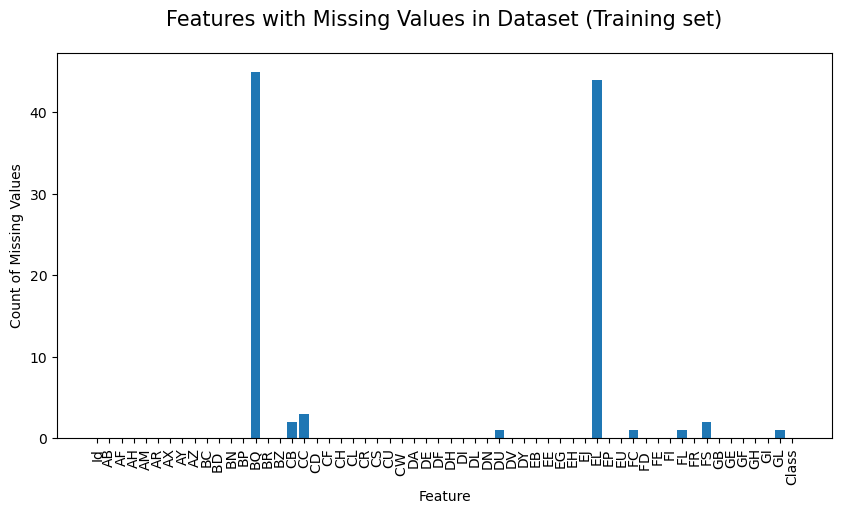

In [151]:
plt.figure(figsize = (10,5))
plt.bar(train.isnull().sum().index, train.isnull().sum().values)
plt.xlabel('Feature', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count of Missing Values', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Features with Missing Values in Dataset (Training set)", fontsize=15, y=1.05)
plt.xticks(rotation=90)
plt.show()

Missing values in several variables (all numerical) are found in the training set.

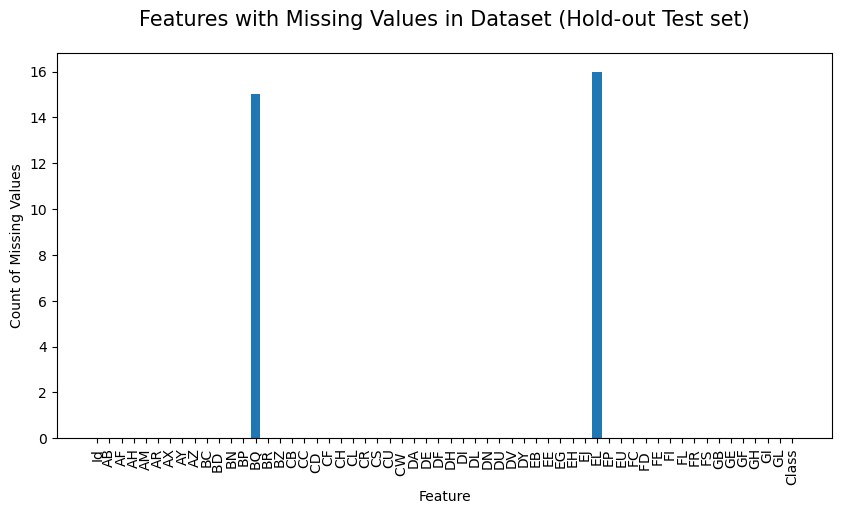

In [153]:
plt.figure(figsize = (10,5))
plt.bar(test.isnull().sum().index, test.isnull().sum().values)
plt.xlabel('Feature', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count of Missing Values', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Features with Missing Values in Dataset (Hold-out Test set)", fontsize=15, y=1.05)
plt.xticks(rotation=90)
plt.show()

Missing values in 2 variables (all numerical) are found in the hold-out final test set.

In [155]:
train_1 = train.loc[train['Class'] == 1,:].copy()
train_0 = train.loc[train['Class'] == 0,:].copy()

In order to fill in missing values in the training set, the variables with missing values are analysed to see if they are 
differentially distributed with distinct means according to their Class label (medical condition).

In [157]:
train_1.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,75.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,0.723430,5276.447398,134.087660,68.463321,11.335113,5.490074,0.167347,10.590055,39.693635,6551.905132,...,12.848368,20.526414,0.421010,23.345083,100.682028,8739.579101,32.442102,53.282212,5.916586,1.0
std,0.829481,4155.036264,151.195875,130.348392,6.749873,2.345314,1.179787,4.538302,183.166698,7549.486395,...,20.204372,142.642550,0.480330,16.178312,59.017816,16801.208766,12.265025,35.107448,9.668919,0.0
min,0.205104,975.508050,85.200147,6.073217,8.138688,0.699861,0.025578,3.396778,1.229900,2141.759450,...,0.173229,0.497060,0.067730,8.250874,72.611063,142.913889,11.069975,8.258692,0.001129,1.0
25%,0.386707,3180.089632,85.200147,15.611977,8.138688,4.245676,0.025578,8.447831,1.229900,4106.925917,...,0.173229,0.687445,0.067730,15.566897,72.611063,1556.930768,24.752092,28.033192,0.055100,1.0
50%,0.557627,4133.404770,85.200147,29.910826,8.138688,5.206877,0.025578,11.189201,4.399528,4992.779215,...,7.775244,1.443620,0.250601,18.766785,72.611063,4468.337338,30.004283,39.503348,0.098791,1.0
75%,0.733888,5925.602320,109.067161,46.437967,10.874745,6.157005,0.025578,12.834023,8.419544,6145.171921,...,14.273512,1.871298,0.616343,28.173432,97.545028,10571.085935,36.557895,70.596256,21.978000,1.0
max,6.161666,28688.187660,1237.940805,630.518230,37.987536,17.983770,10.315851,30.192882,1463.693448,53060.599240,...,137.932739,1244.227020,2.614378,135.781294,363.134821,134409.538300,81.210825,157.079756,21.978000,1.0


In [158]:
train_0.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,354.000000,355.000000,354.000000,355.000000,355.000000,355.000000,355.000000,355.000000,354.000000,355.0
mean,0.425278,3206.284593,112.590357,32.555036,9.679368,5.491382,0.042526,10.466140,3.246599,5247.351835,...,4.594461,1.125038,0.368076,20.089621,137.040361,15241.395974,31.638185,50.192855,8.903573,0.0
std,0.352533,1702.709315,109.369892,43.594378,9.587178,2.103872,0.045365,4.520249,4.260412,1507.362995,...,10.763796,0.538758,0.352387,8.616640,144.869356,20450.528574,9.472482,35.944837,10.393625,0.0
min,0.098279,192.593280,85.200147,4.270763,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.007333,0.0
25%,0.241424,2163.961580,85.200147,12.333803,8.138688,4.101717,0.025578,7.858594,1.229900,4208.758467,...,0.173229,0.497060,0.067730,13.594873,72.611063,2965.290971,25.286055,22.854792,0.149023,0.0
50%,0.337567,2923.502780,85.200147,20.065463,8.138688,4.952181,0.025578,10.300619,1.229900,5111.015235,...,2.773861,1.122300,0.257374,18.557490,72.611063,7900.743078,31.286168,41.671544,0.375375,0.0
75%,0.502078,4138.521860,112.463672,37.716814,8.138688,6.524653,0.035779,12.789909,4.418855,6094.244660,...,5.421202,1.483930,0.551999,25.320044,138.517120,19506.710305,37.276978,68.142568,21.978000,0.0
max,4.277273,14503.256020,1910.123198,630.518230,173.534448,13.447962,0.595602,38.971568,54.150740,12083.348910,...,110.342316,3.536260,2.506010,62.667574,1228.992706,143790.071200,80.537324,191.194764,21.978000,0.0


Descriptive statistics show that the variables in Class 1 and 0 have different means.

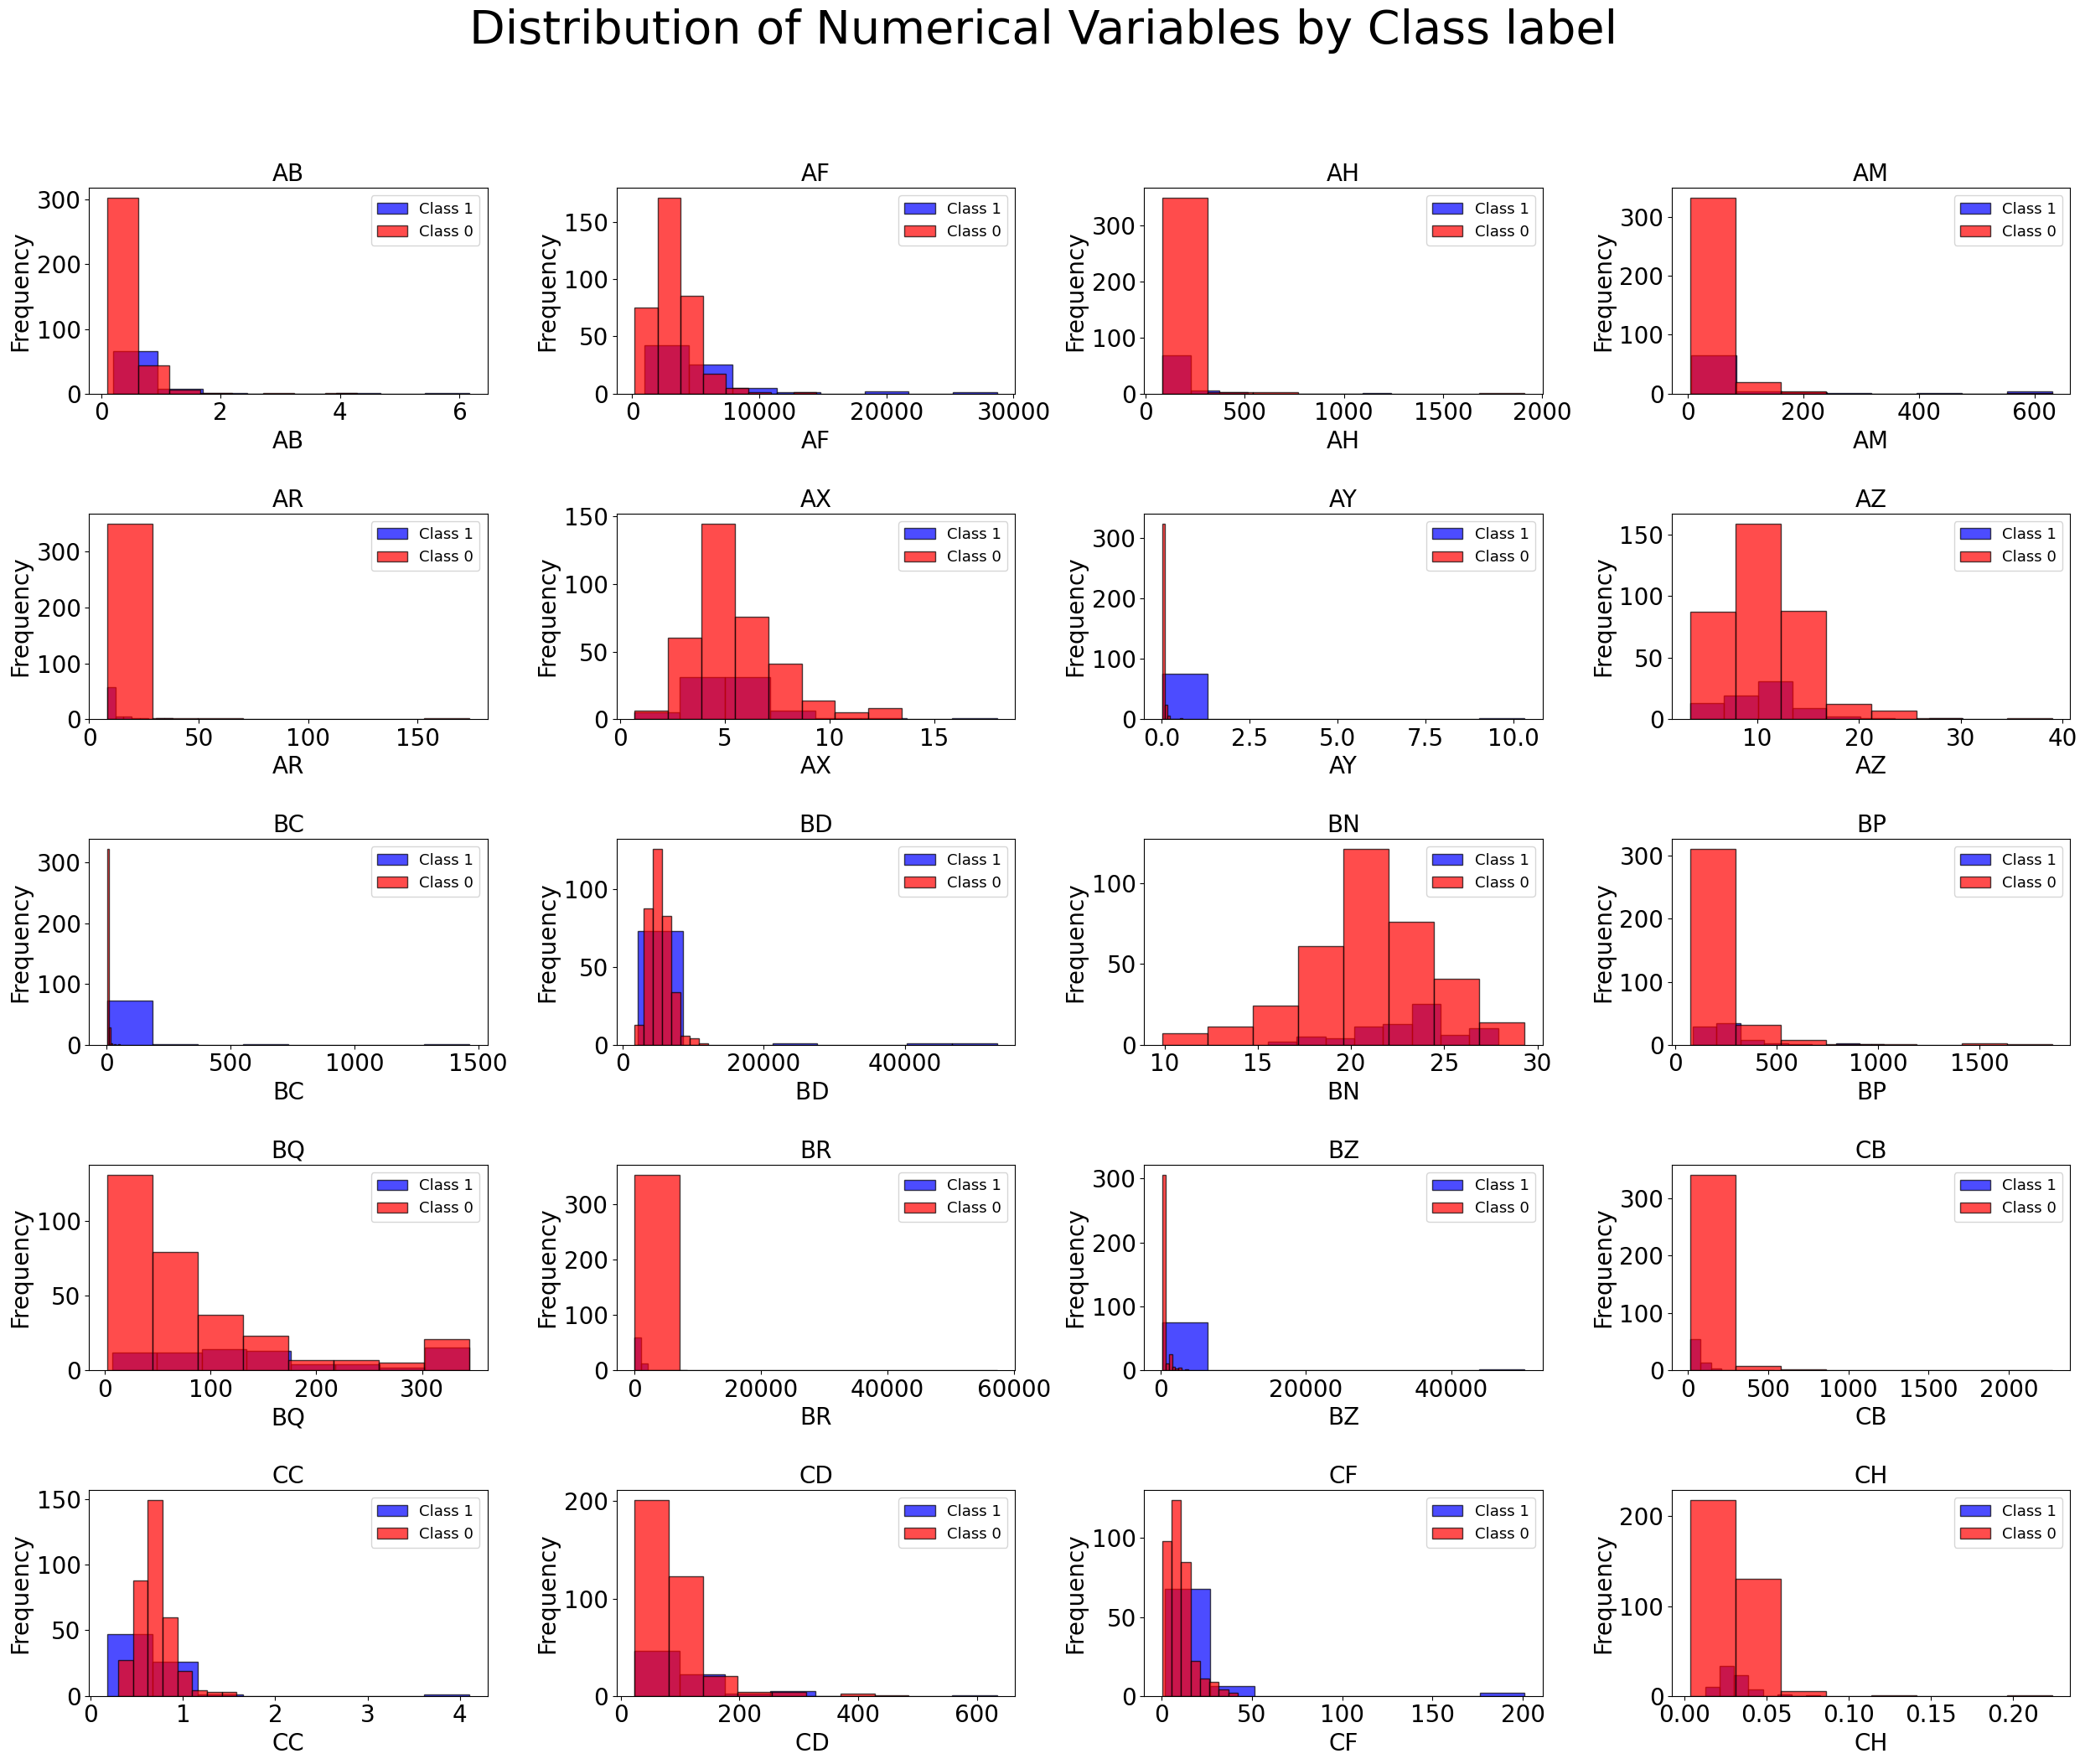

In [160]:
histogram2(train_1, train_0, 1, 21)

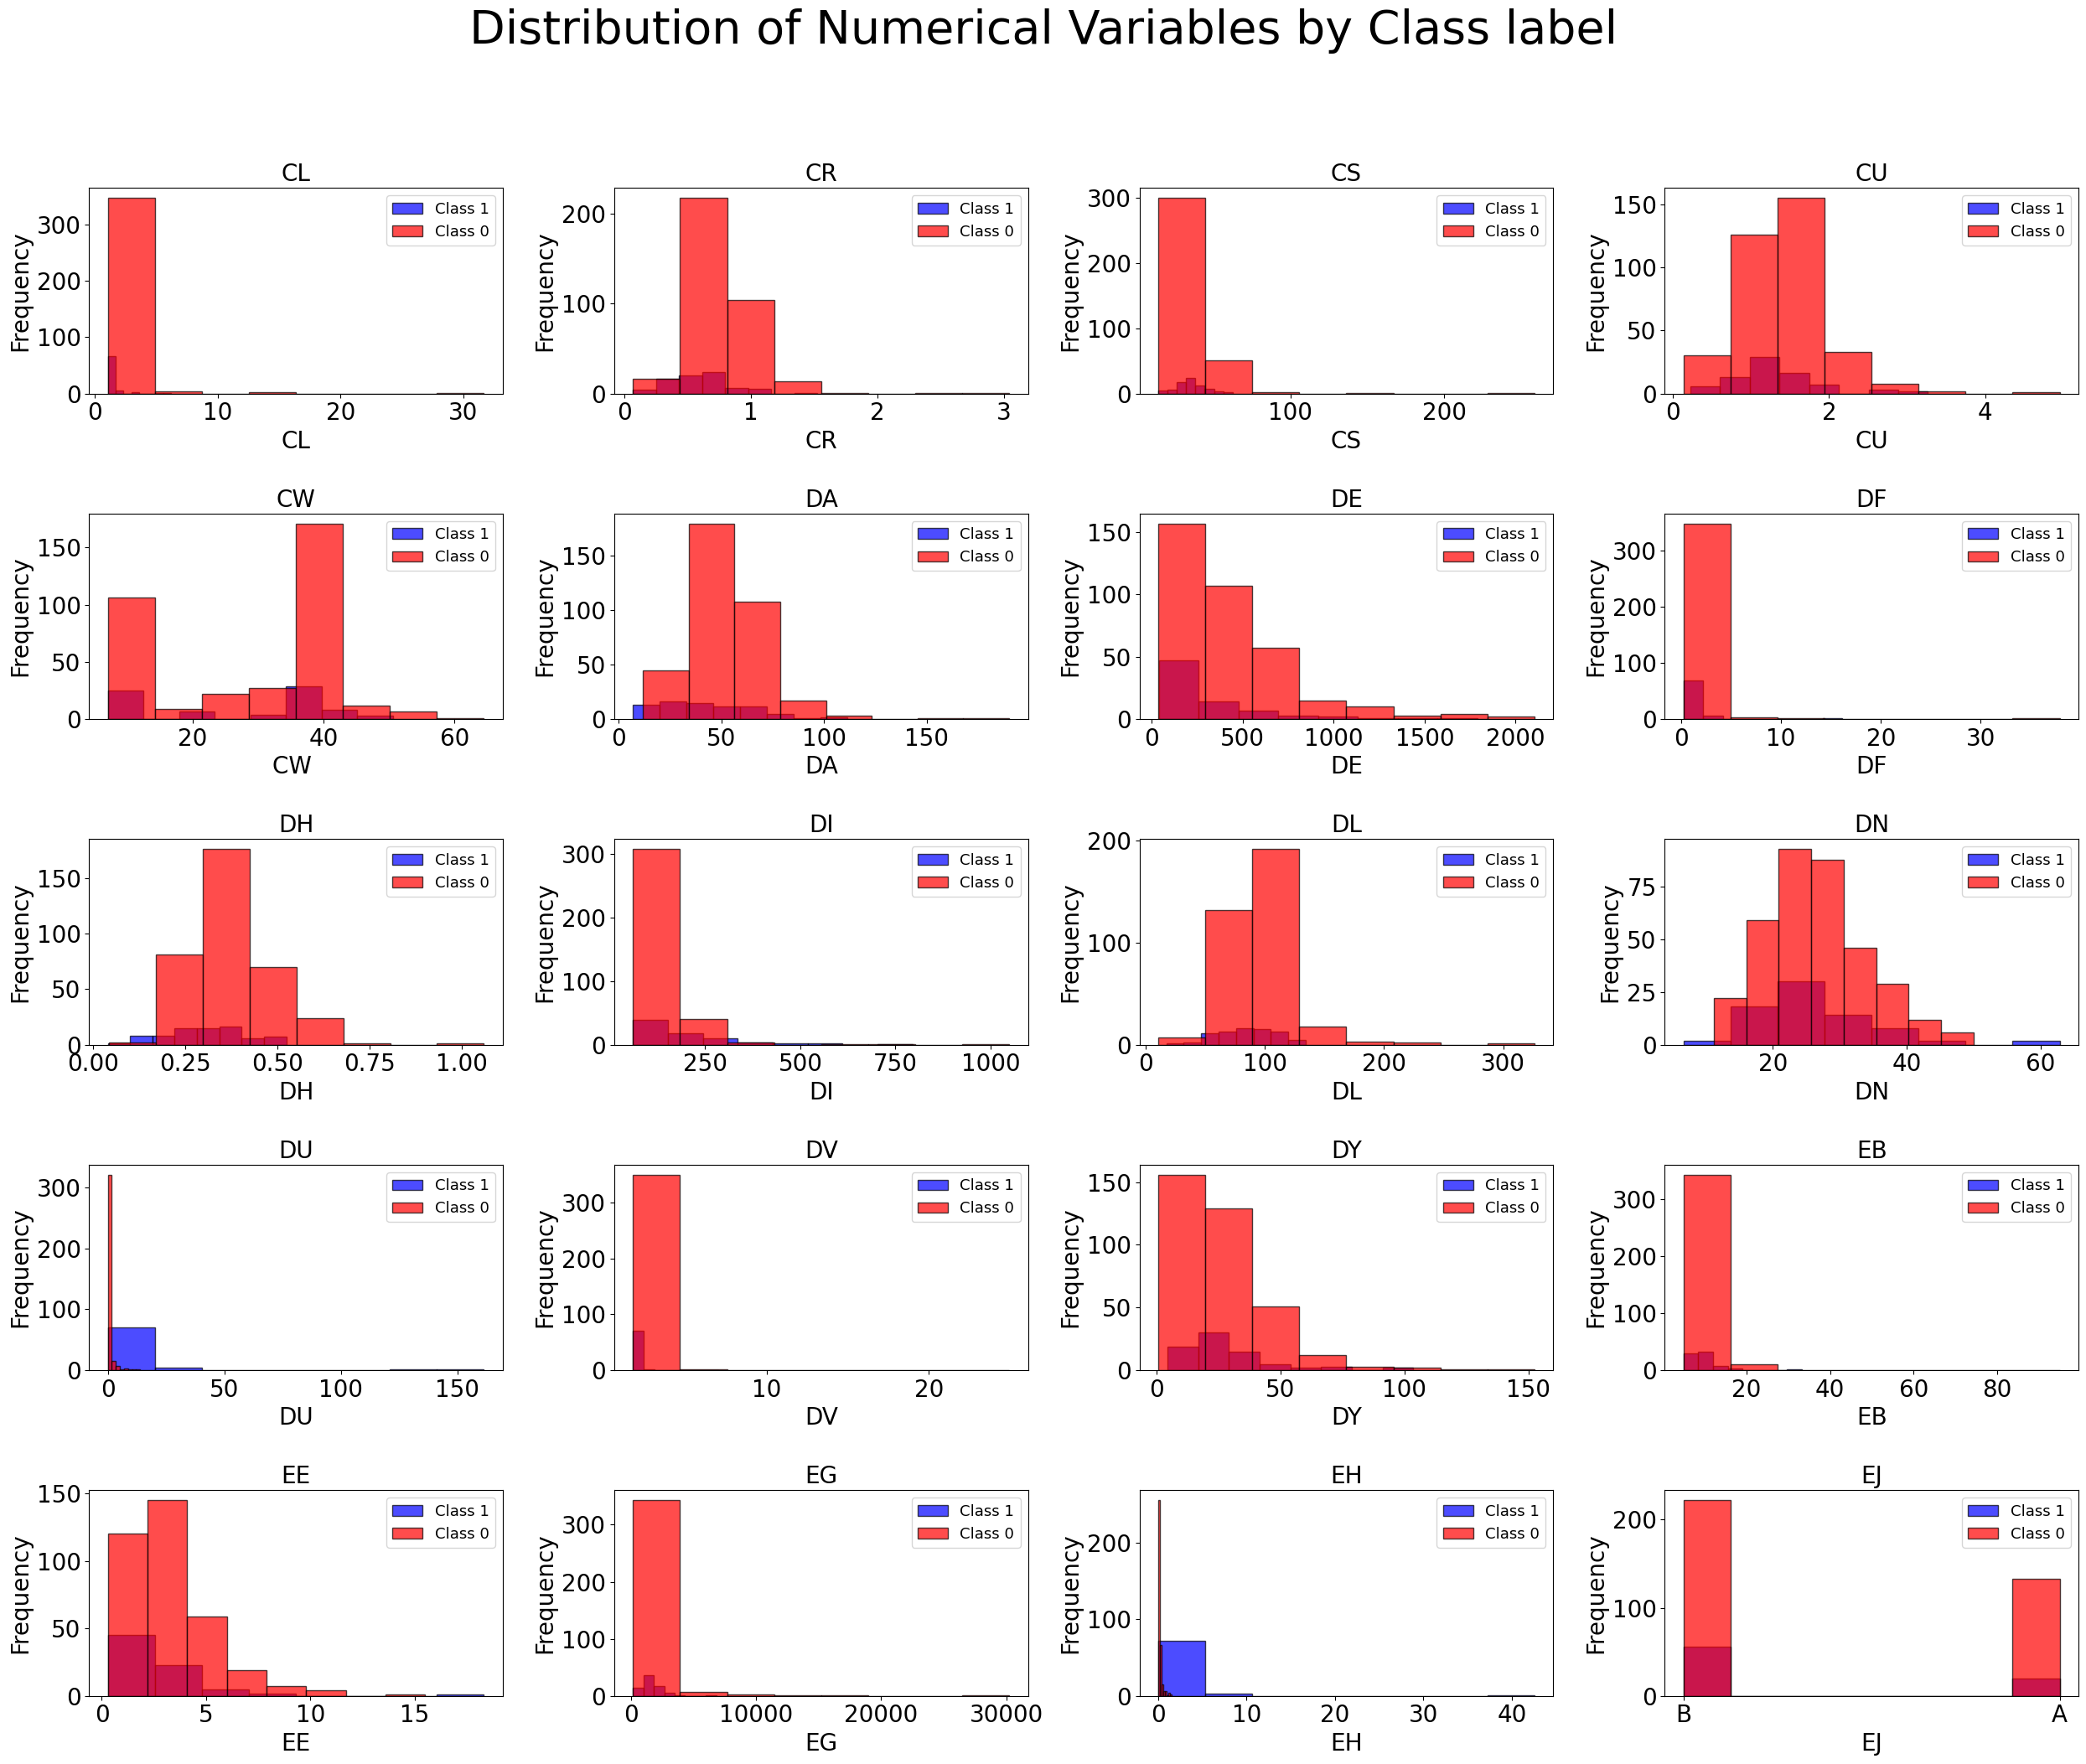

In [161]:
histogram2(train_1, train_0, 21, 41)

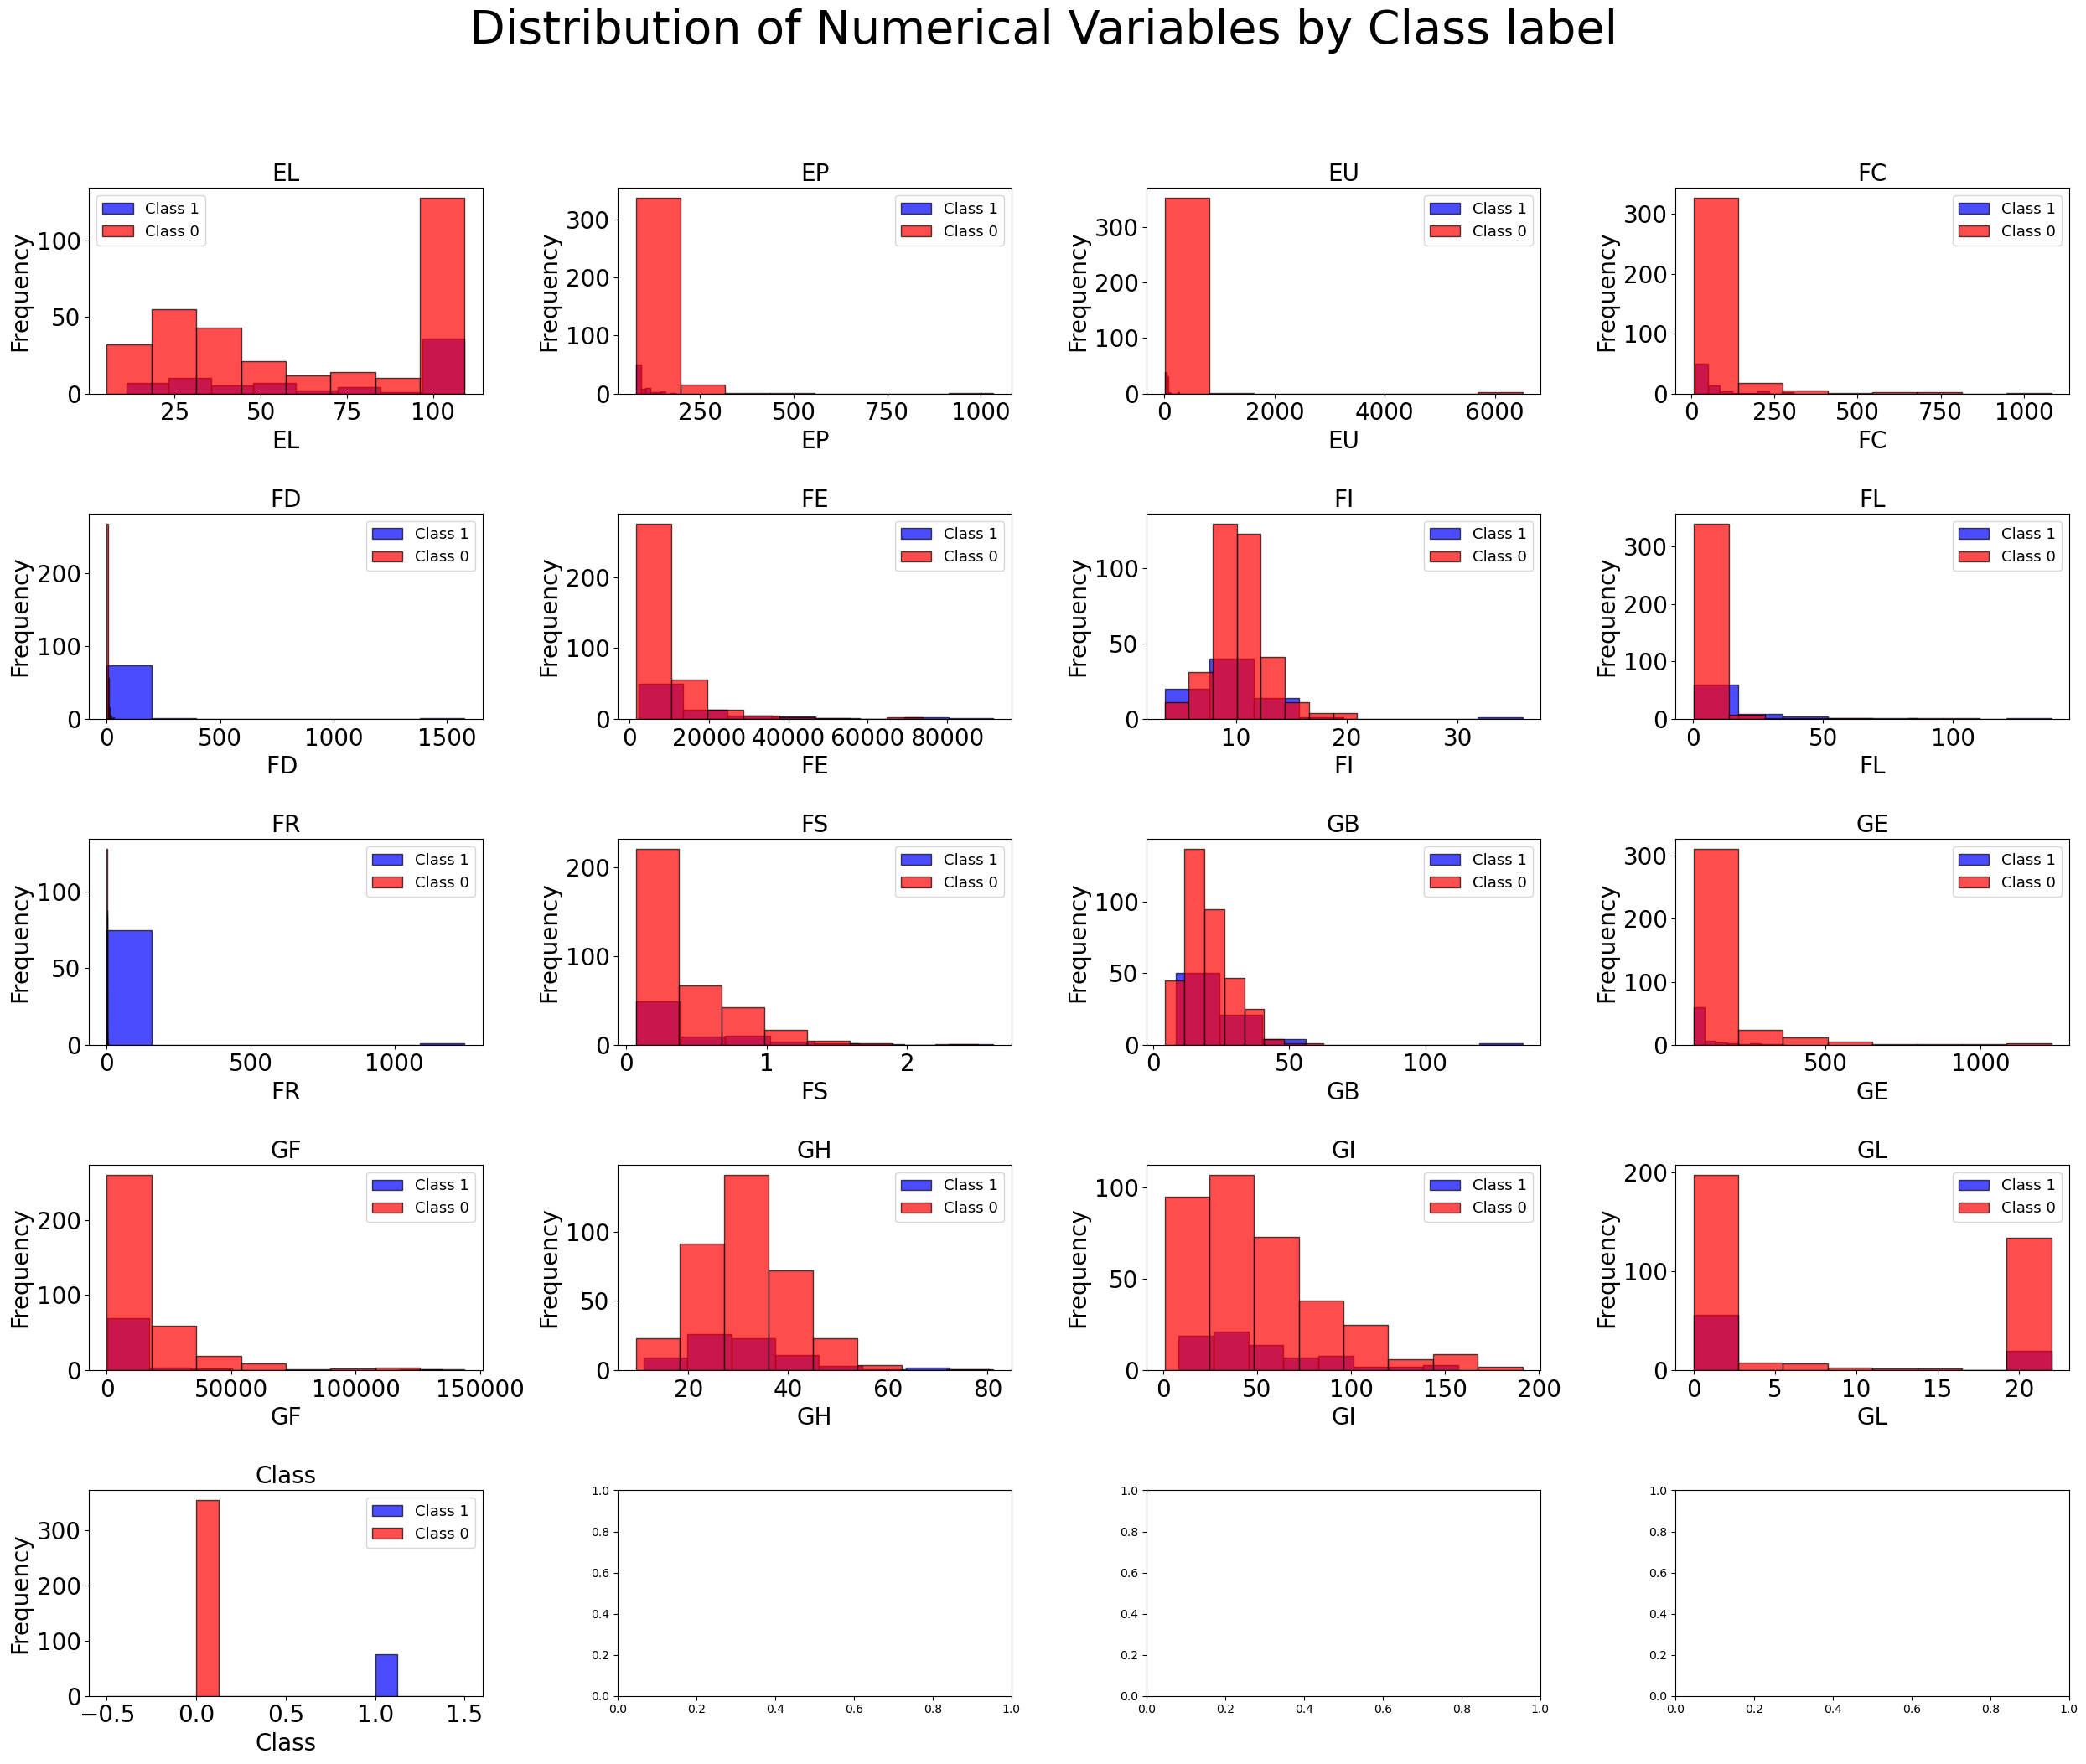

In [162]:
histogram2(train_1, train_0, 41, 59)

The above histigrams show that the variables exhibit differential distribution according to Class label to some extent. Hence, missing values
in these variables must be filled in with their medians in Class 1 and 0.

In [164]:
# Fill missing values with the median of each feature.
train_1.fillna(train_1.select_dtypes('float').median(), inplace=True)
train_0.fillna(train_0.select_dtypes('float').median(), inplace=True)

In [165]:
train = pd.concat([train_1, train_0], ignore_index=True)

In [166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      431 non-null    object 
 1   AB      431 non-null    float64
 2   AF      431 non-null    float64
 3   AH      431 non-null    float64
 4   AM      431 non-null    float64
 5   AR      431 non-null    float64
 6   AX      431 non-null    float64
 7   AY      431 non-null    float64
 8   AZ      431 non-null    float64
 9   BC      431 non-null    float64
 10  BD      431 non-null    float64
 11  BN      431 non-null    float64
 12  BP      431 non-null    float64
 13  BQ      431 non-null    float64
 14  BR      431 non-null    float64
 15  BZ      431 non-null    float64
 16  CB      431 non-null    float64
 17  CC      431 non-null    float64
 18  CD      431 non-null    float64
 19  CF      431 non-null    float64
 20  CH      431 non-null    float64
 21  CL      431 non-null    float64
 22  CR

In [167]:
test_1 = test.loc[test['Class'] == 1,:].copy()
test_0 = test.loc[test['Class'] == 0,:].copy()

Similar to the training set, in order to fill in missing values in the hold-out test set, the variables with missing values are analysed to see if they are differentially distributed with distinct means according to their Class label (medical condition).

In [169]:
test_1.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0
mean,0.854466,4384.342511,123.683449,91.009507,12.219749,7.500943,0.057636,10.940863,7.275298,4978.190848,...,8.353505,1.420683,0.433472,20.598407,130.721805,10622.310258,31.649896,64.592766,5.736840,1.0
std,0.775028,2659.939849,136.914984,154.879669,8.430095,6.255742,0.107387,4.849134,8.589247,1639.259848,...,8.583825,0.858697,0.453342,11.654895,136.235329,11130.554414,11.869982,49.440562,9.548081,0.0
min,0.132463,192.593280,85.200147,6.900116,8.138688,3.038637,0.025578,3.396778,1.229900,2298.699030,...,0.173229,0.497060,0.067730,5.878864,72.611063,13.038894,13.886772,3.914584,0.001317,1.0
25%,0.334362,2812.738170,85.200147,17.884401,8.138688,4.449433,0.025578,8.665250,1.229900,3865.241401,...,0.221282,0.748708,0.067730,13.690219,72.611063,2393.628853,25.687924,27.323963,0.056831,1.0
50%,0.549081,4048.480920,85.200147,32.640831,8.138688,6.068415,0.025578,10.858346,4.236127,4782.038970,...,7.017486,1.346325,0.308172,18.455168,72.611063,8427.615435,29.170780,45.267200,0.125828,1.0
75%,1.031929,5199.694582,89.250921,79.104348,13.172273,7.984174,0.039813,14.151141,8.350143,5512.944195,...,10.999256,1.823085,0.553693,23.050356,120.368219,12937.369082,41.482638,111.208136,7.722000,1.0
max,3.068014,13743.651900,846.122895,630.518230,50.253252,38.270880,0.624529,23.626198,31.682224,10449.202150,...,31.251519,3.718960,1.774526,61.551334,771.058022,50177.312030,69.154785,176.662964,21.978000,1.0


In [170]:
test_0.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.0
mean,0.396779,3124.689378,123.852046,28.383392,10.132787,5.291584,0.049076,10.708223,3.679477,5072.292219,...,3.094956,1.140011,0.542060,20.922372,134.960302,17159.044479,30.644175,47.244918,9.545245,0.0
std,0.253199,1620.726949,151.267807,27.968518,13.927577,2.115464,0.059440,3.741407,4.962976,1470.911561,...,3.560251,0.602079,2.525311,8.364356,170.632211,18679.396884,8.979755,33.915451,10.428623,0.0
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,2156.508990,...,0.173229,0.497060,0.067730,5.916072,72.611063,13.038894,9.432735,3.150700,0.027000,0.0
25%,0.235015,1986.094000,85.200147,11.332697,8.138688,4.139368,0.025578,8.547087,1.229900,4147.994517,...,0.173229,0.497060,0.067730,14.206480,72.611063,3275.268696,24.504645,20.855705,0.172571,0.0
50%,0.324748,2841.028575,85.200147,17.484113,8.138688,5.036342,0.025578,10.637776,1.229900,4923.801545,...,1.967199,1.126795,0.223509,19.524898,72.611063,10077.689440,29.602415,38.990234,0.801900,0.0
75%,0.491395,3969.815190,120.887452,31.014132,8.138688,6.117140,0.049253,13.262559,4.951226,5813.731740,...,5.152981,1.439995,0.501202,25.768866,120.827587,24175.874385,36.123468,64.125104,21.978000,0.0
max,1.491277,8941.840710,1817.620554,145.589970,178.943634,17.877462,0.601997,22.951884,50.471582,9306.496320,...,18.988923,4.209350,31.365763,46.156524,1497.351958,119212.643900,58.188998,164.309648,21.978000,0.0


Descriptive statistics show that the variables in Class 1 and 0 have different means.

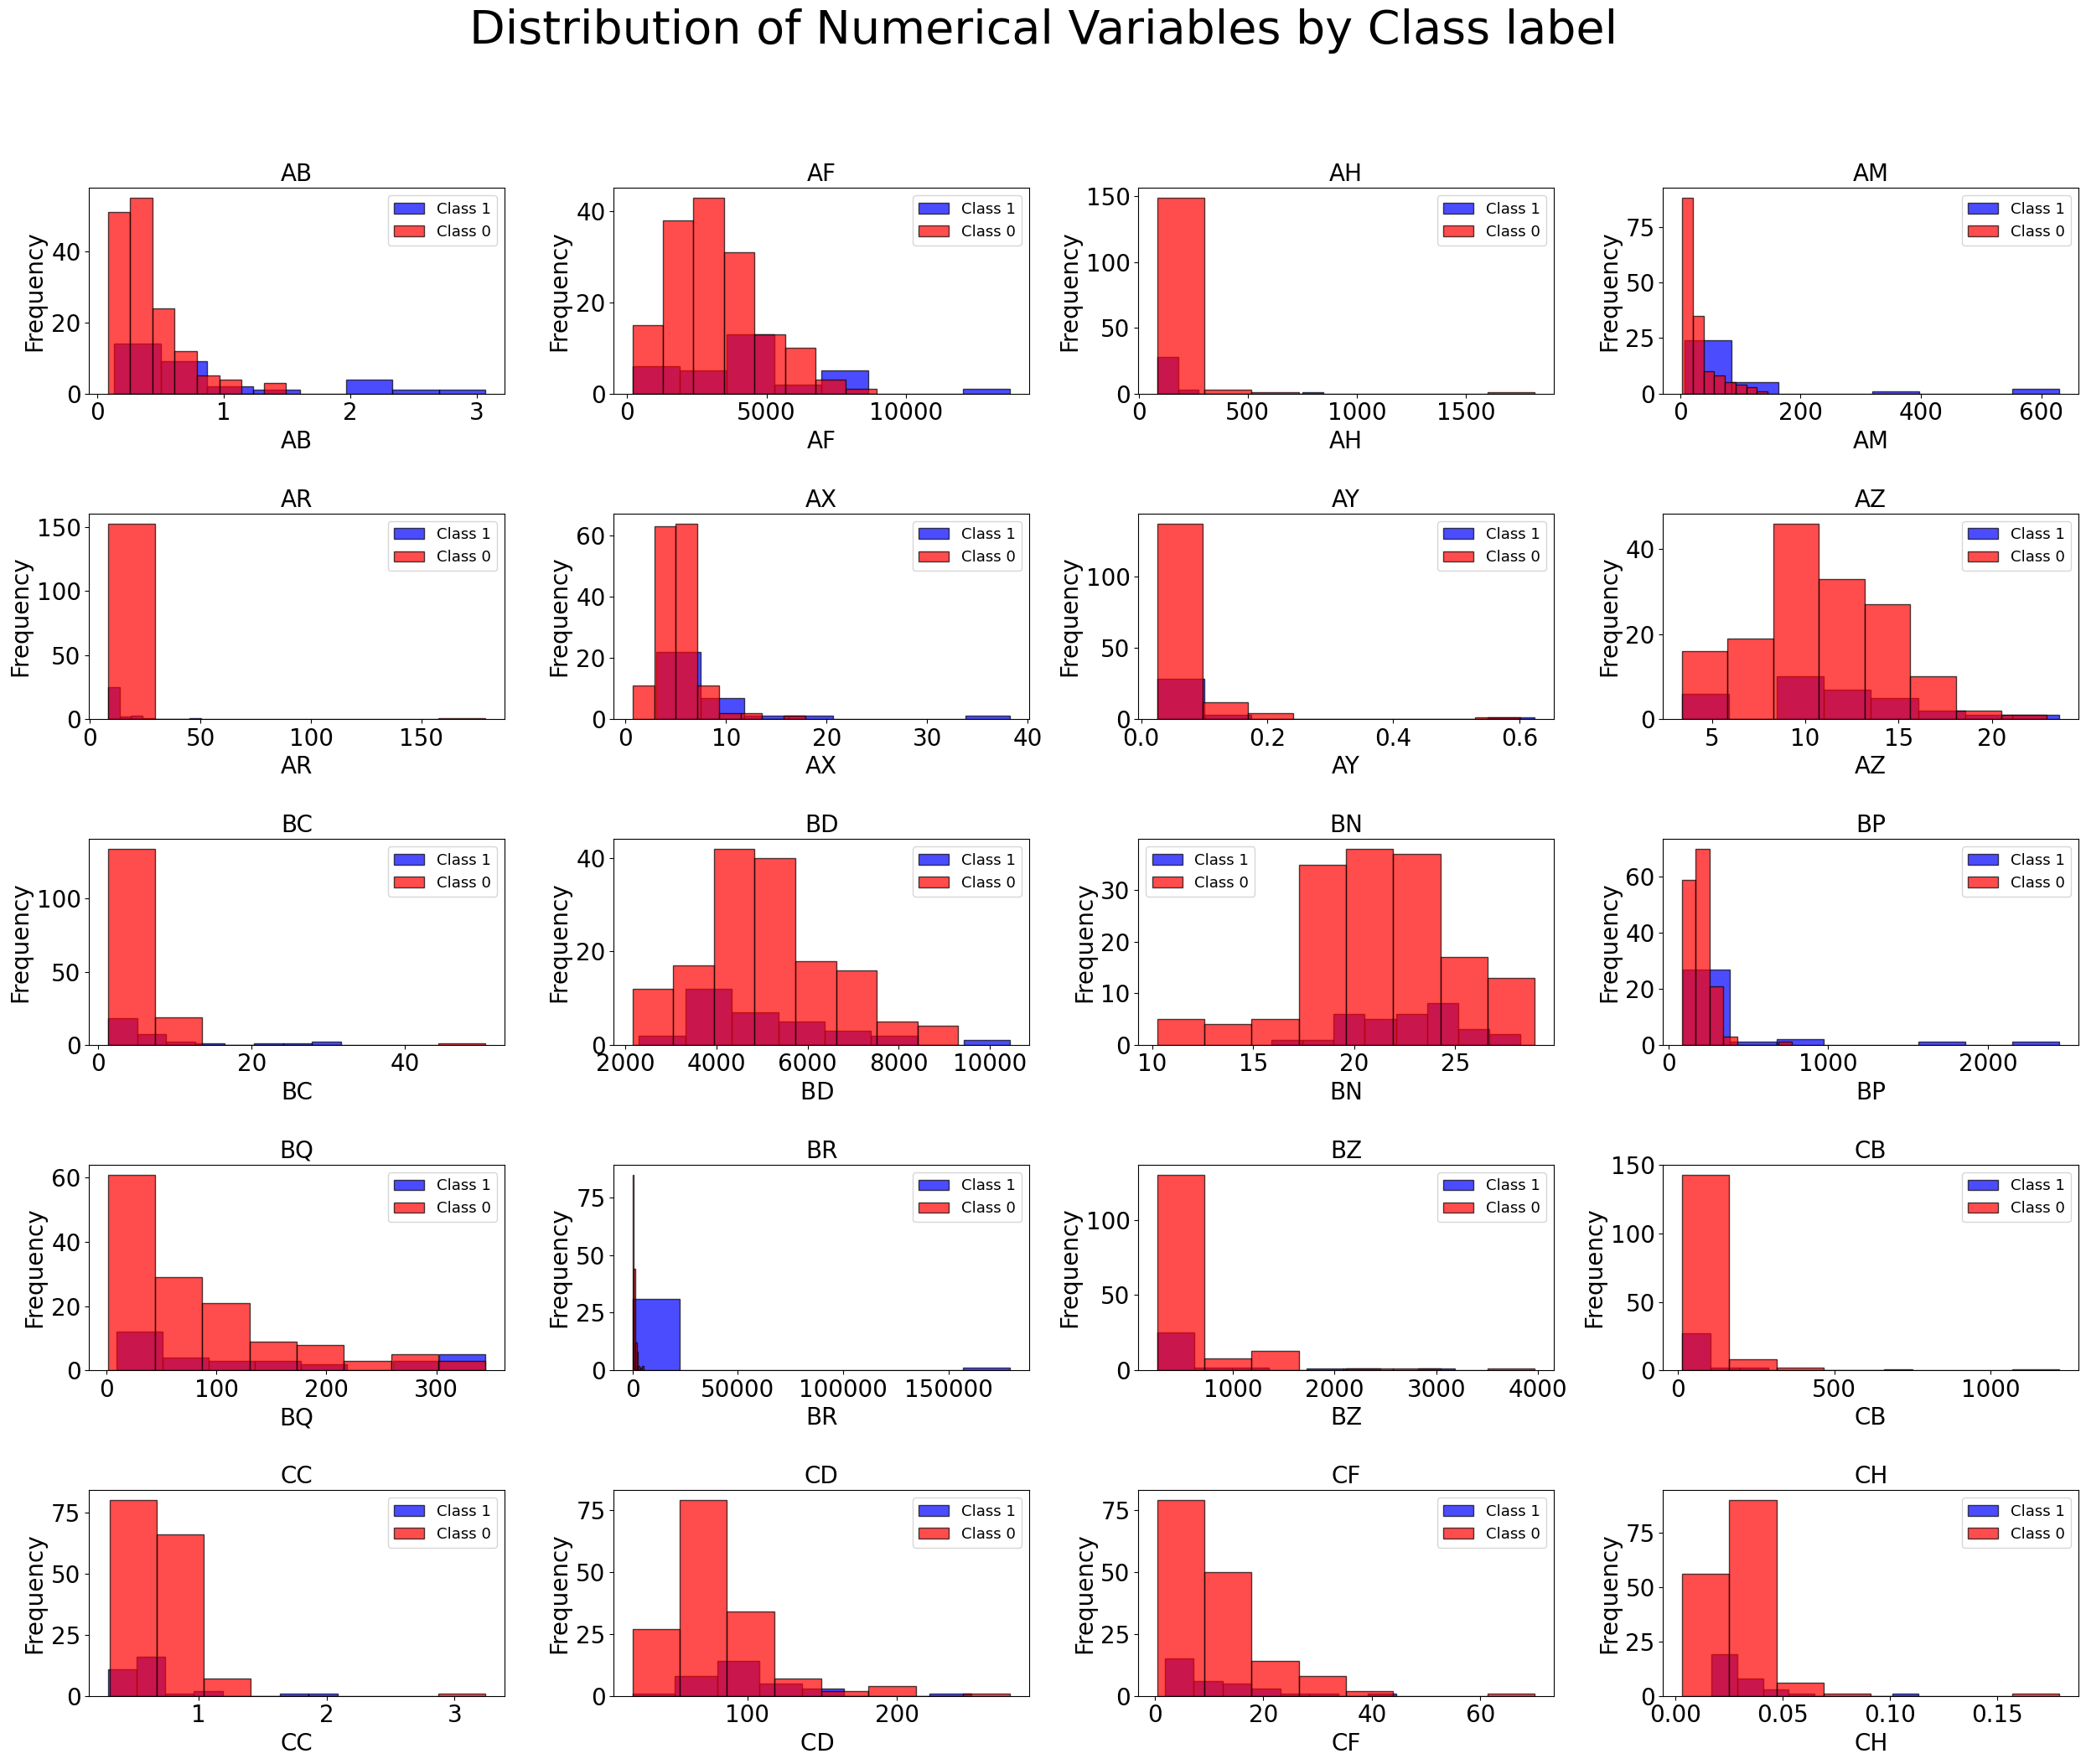

In [172]:
histogram2(test_1, test_0, 1, 21)

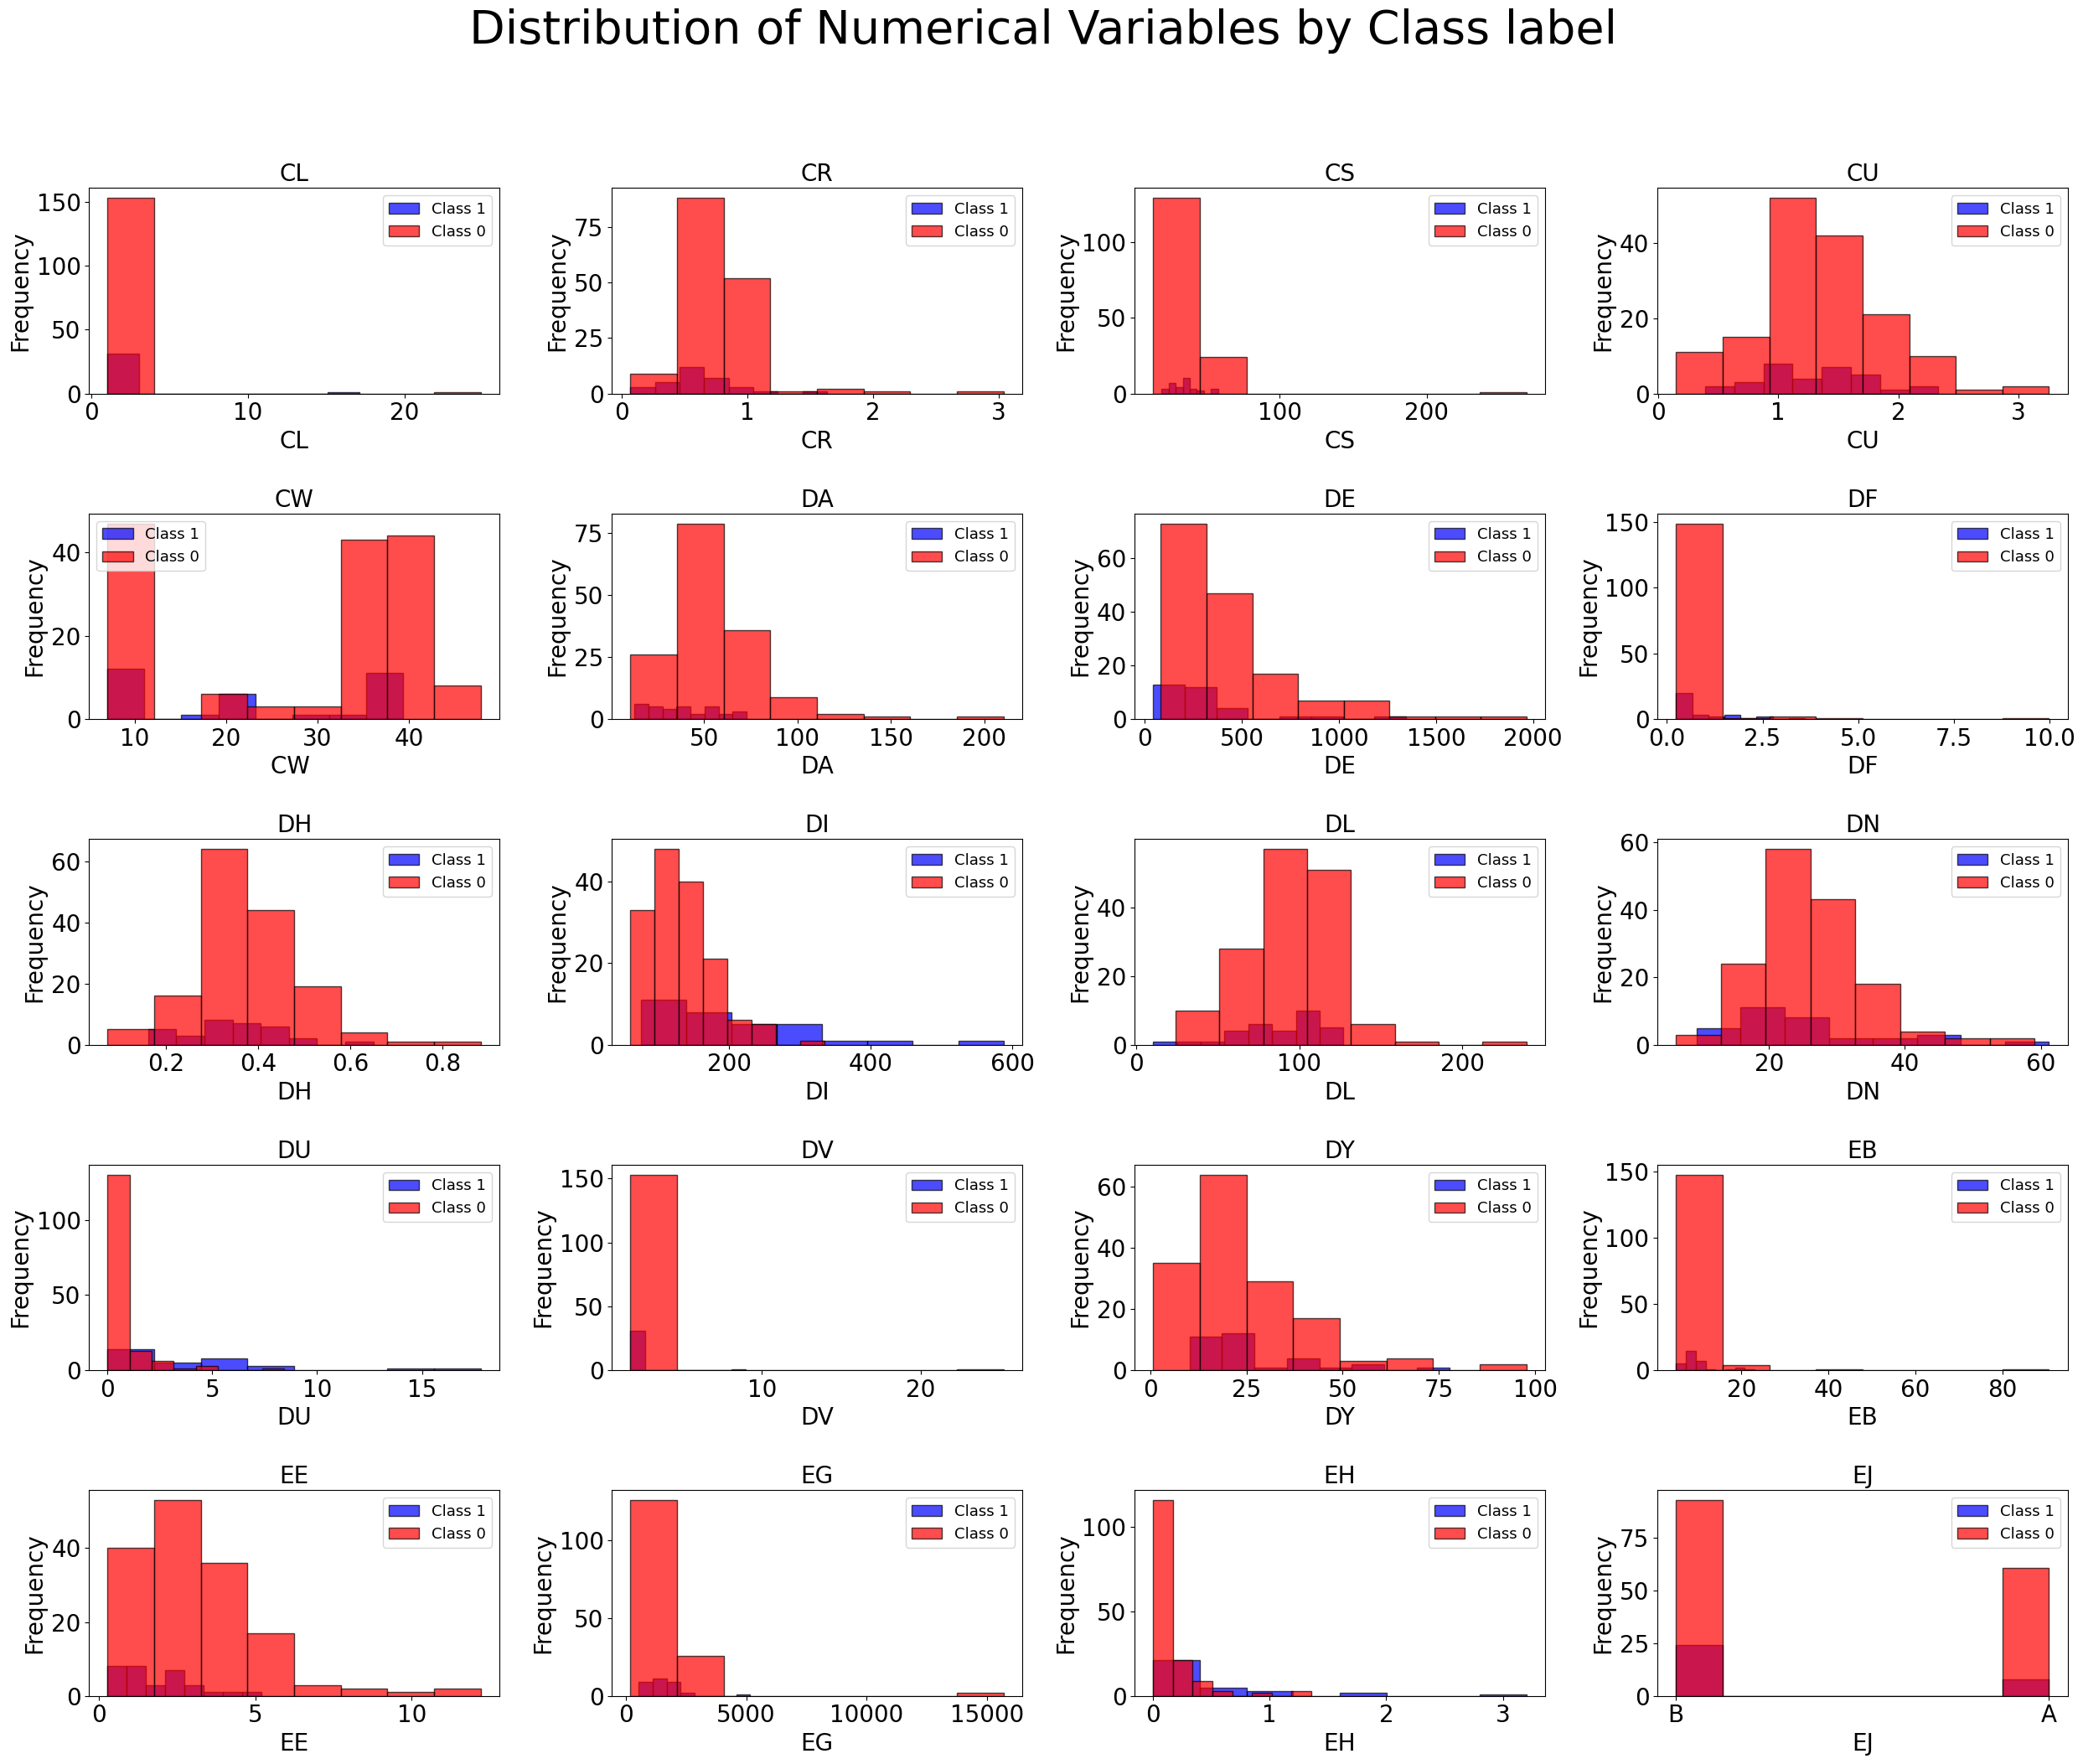

In [173]:
histogram2(test_1, test_0, 21, 41)

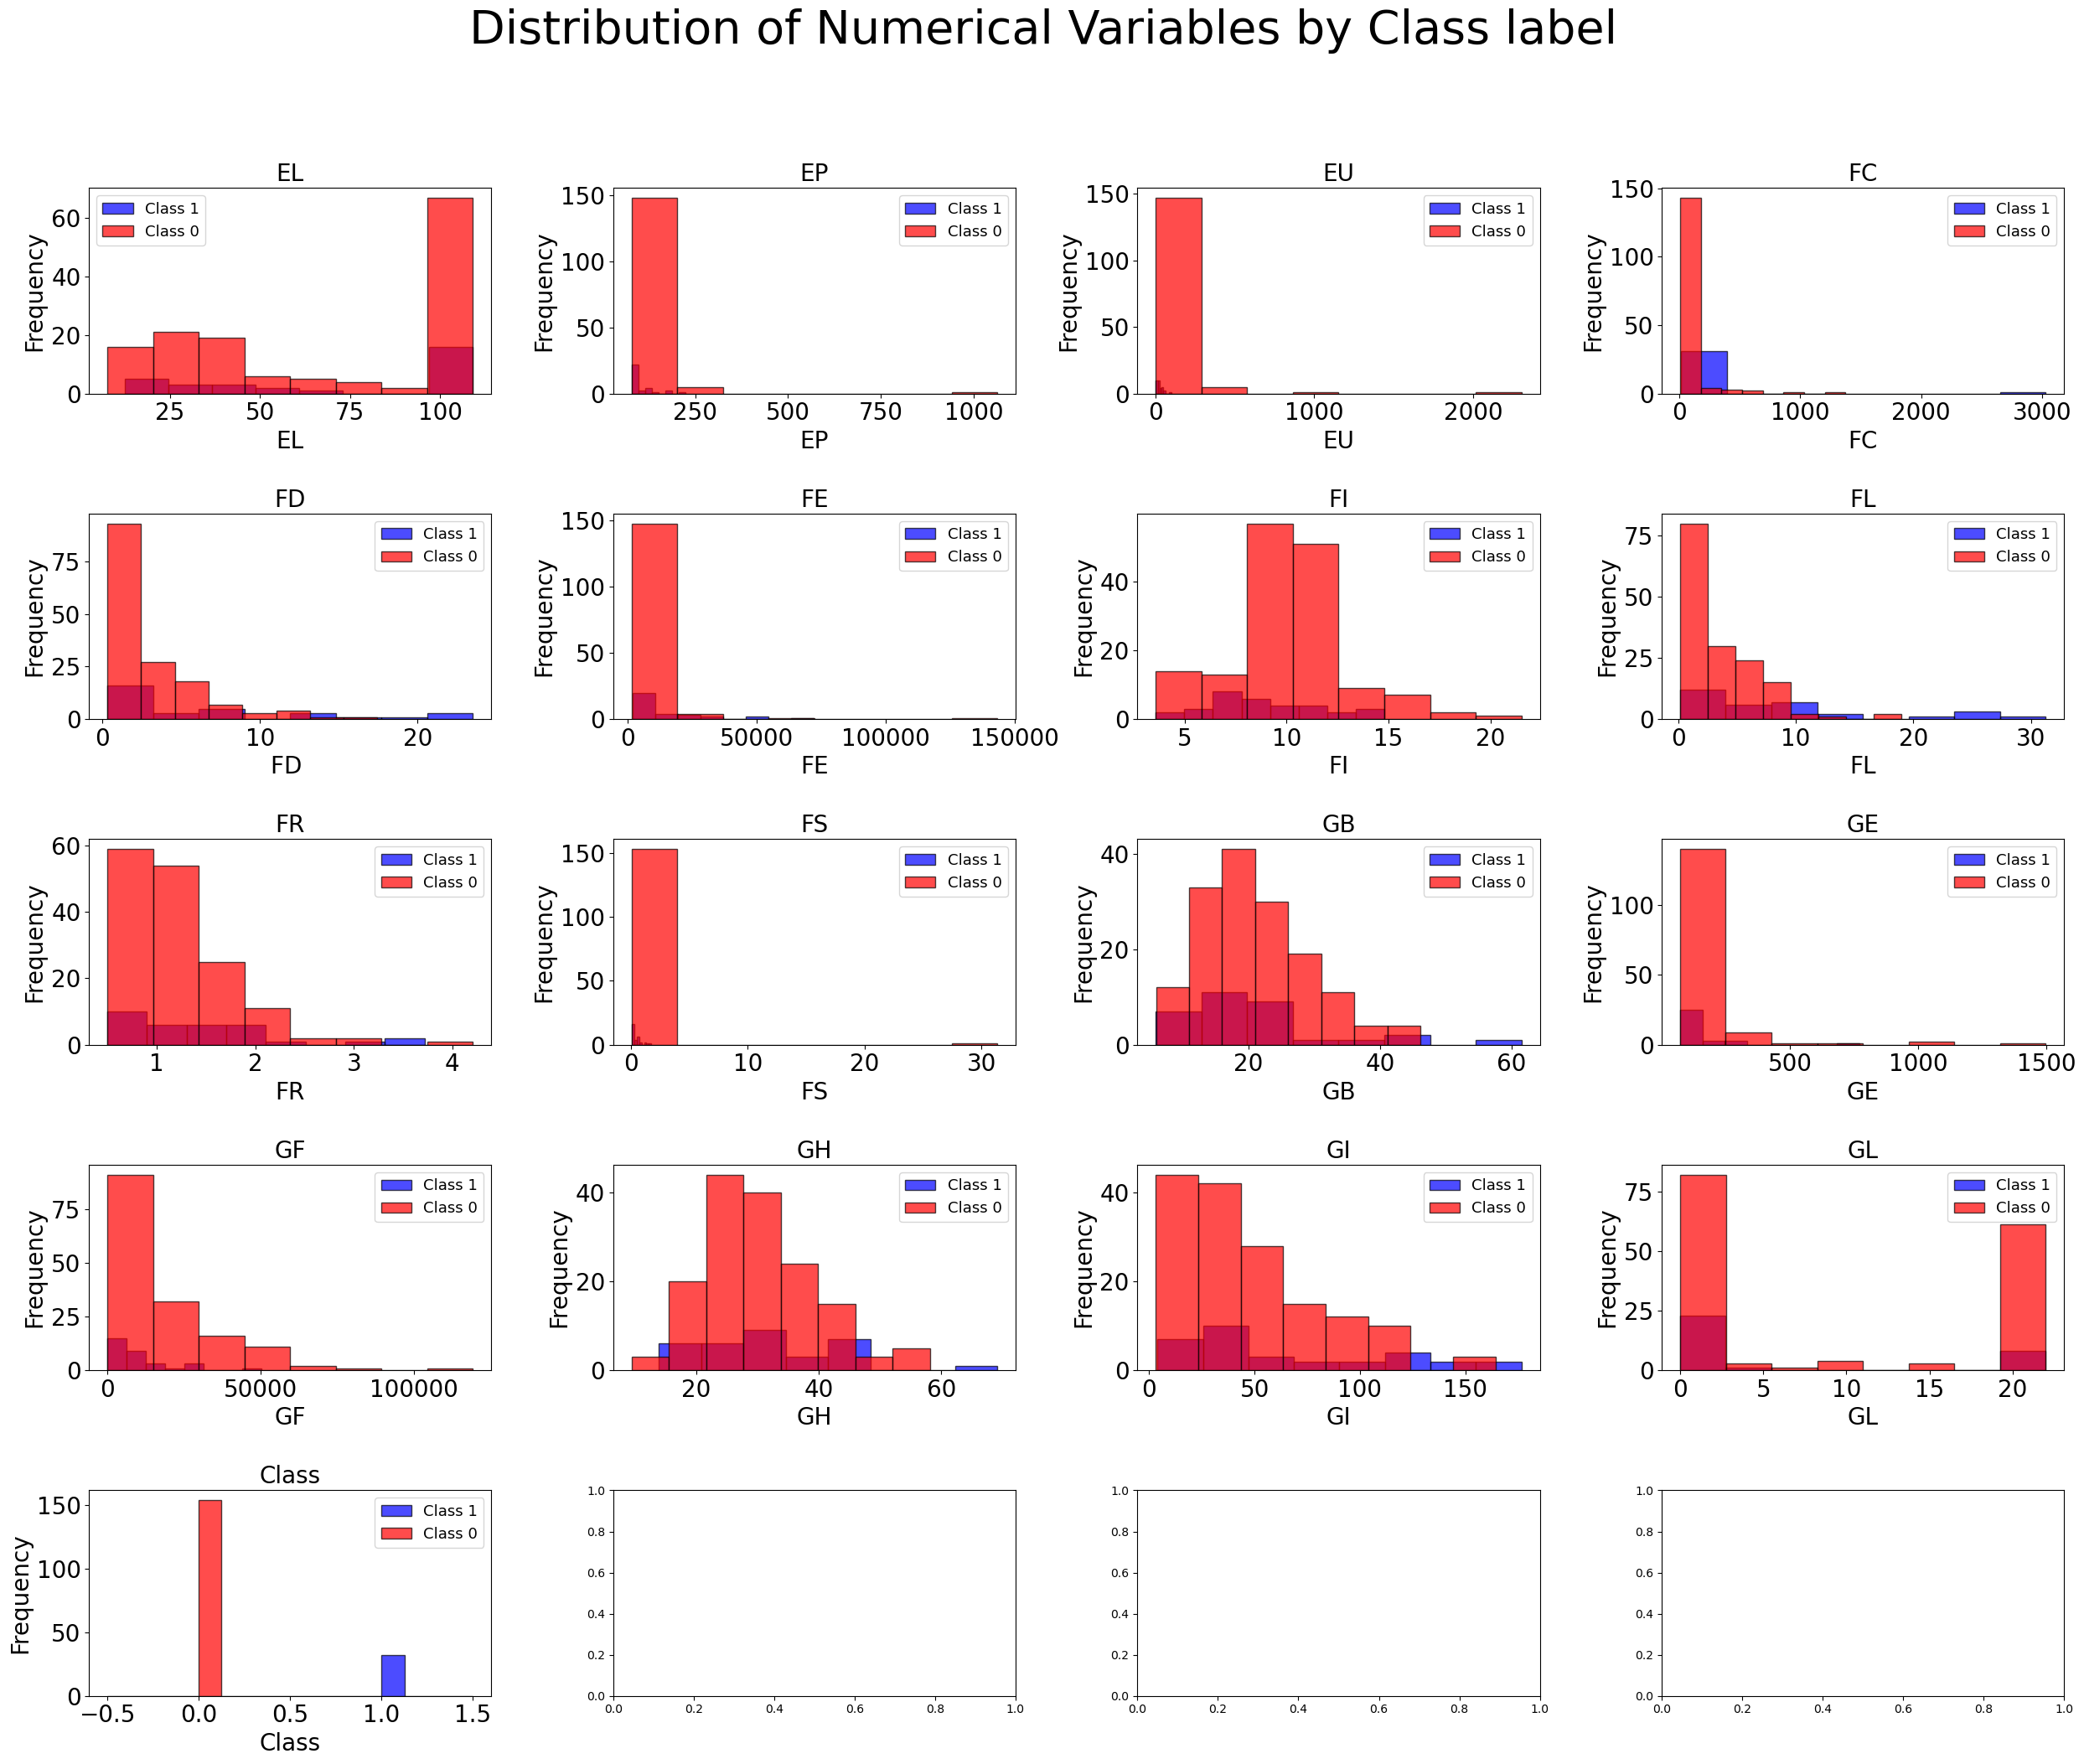

In [174]:
histogram2(test_1, test_0, 41, 59)

The above histigrams show that the variables exhibit differential distribution according to Class label to some extent. Hence, missing values in these variables must be filled in with their medians in Class 1 and 0.

In [176]:
# Fill missing values with the median of each feature.
test_1.fillna(test_1.select_dtypes('float').median(), inplace=True)
test_0.fillna(test_0.select_dtypes('float').median(), inplace=True)

In [177]:
test = pd.concat([test_1, test_0], ignore_index=True)

### **3. Exploratory Data Analysis**
The purpose of this step are as follow:
1) To determine the correlation between the X variables.
2) To explore the relationship (if any) between the X variables and Y variable (Class Label, which is presence or absence of medical condition).
3) To check if the dataset is a balanced one or not.

**3.1 Correlation between the features (X variables).**

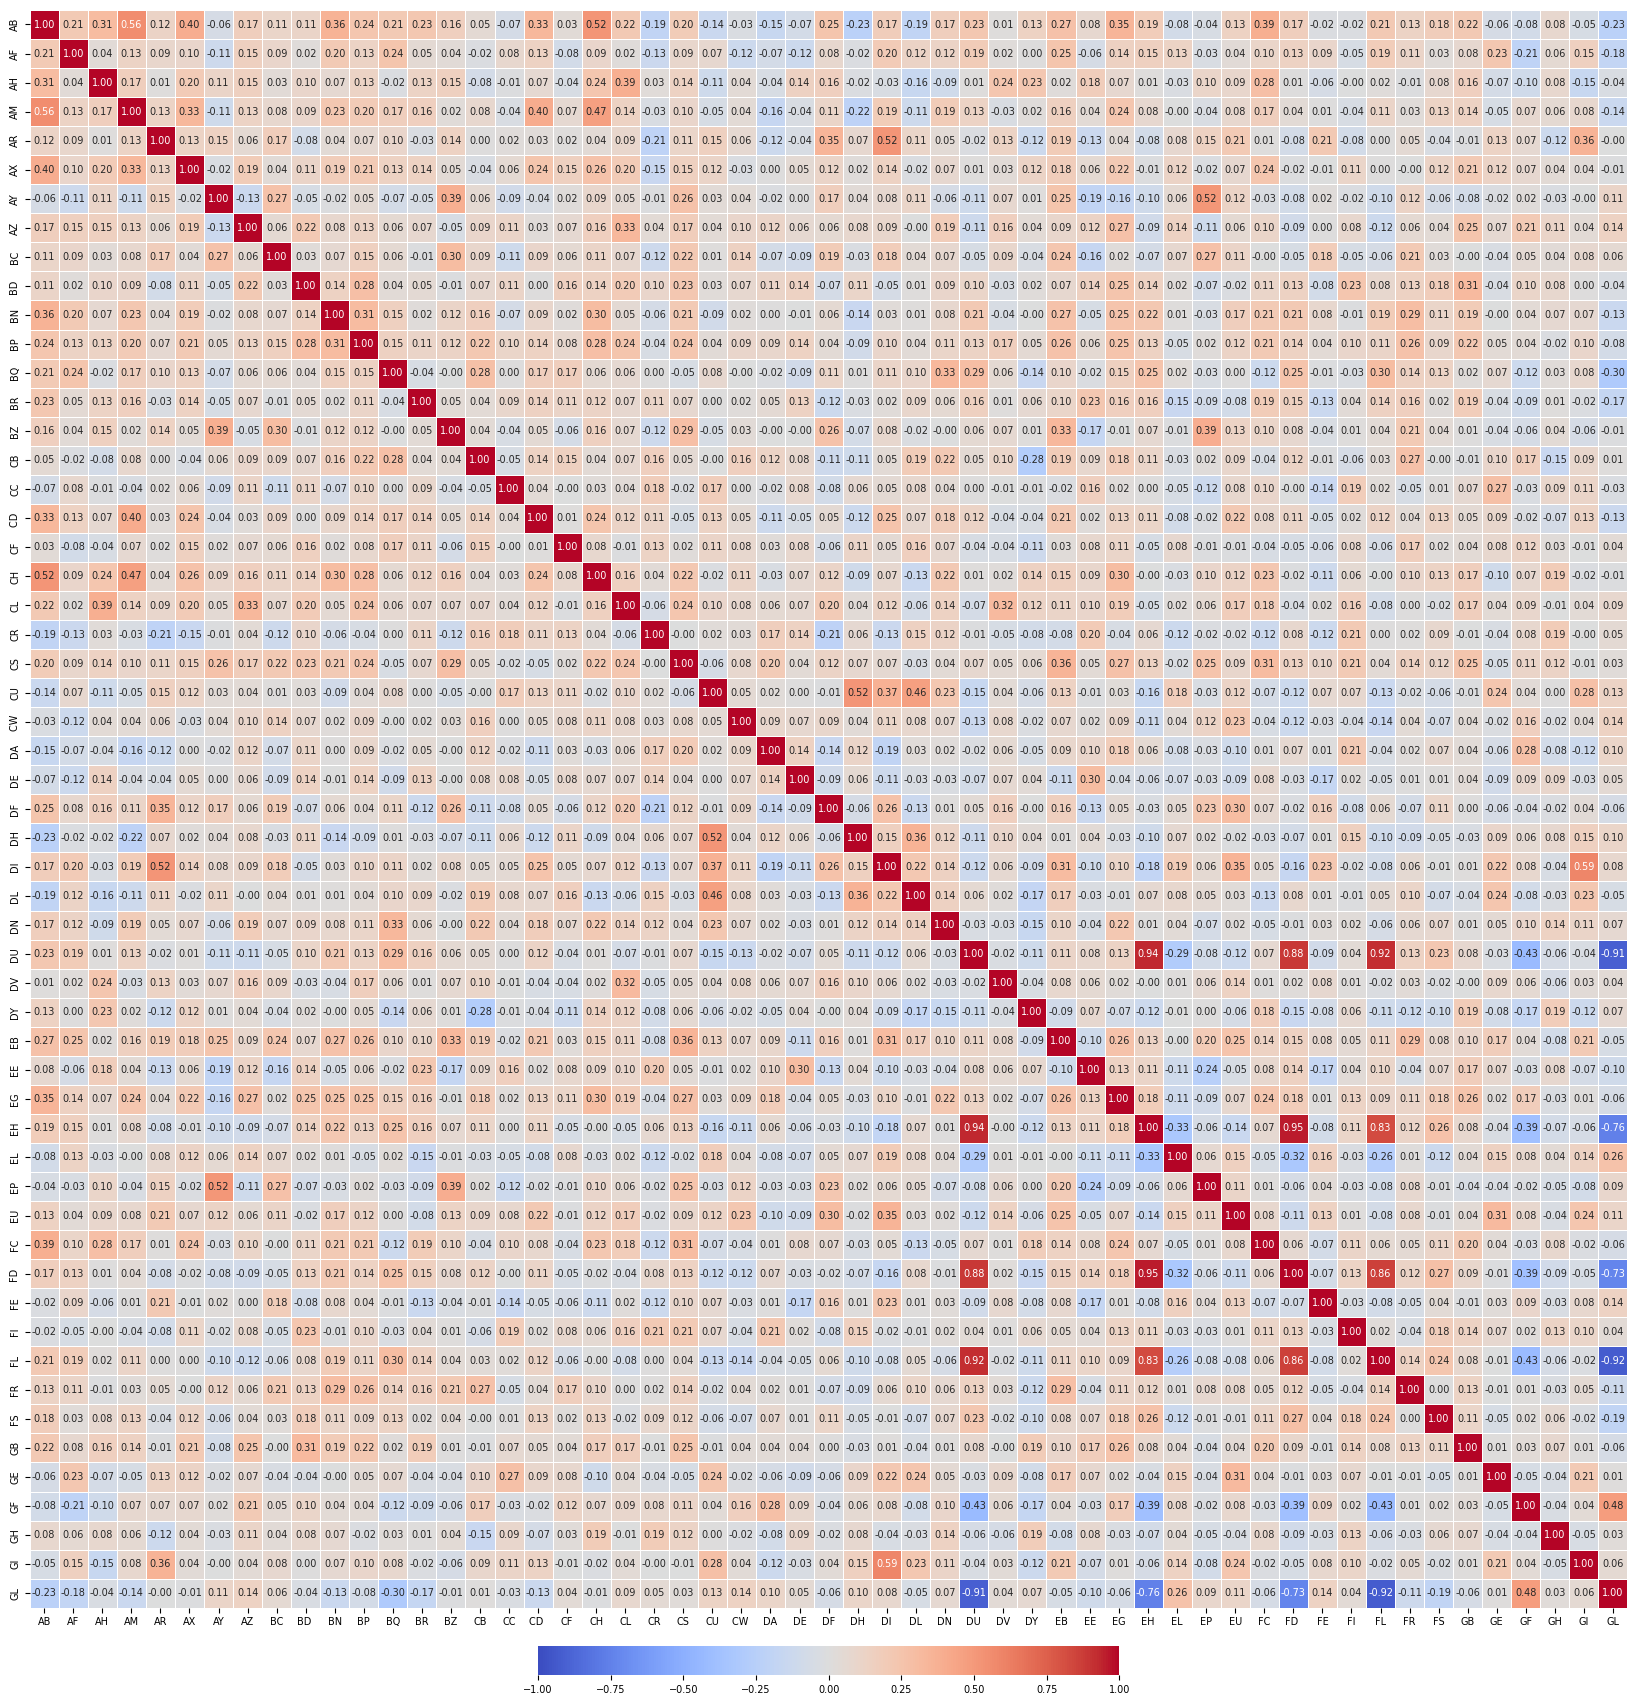

In [180]:
# Determine the correlation between the numerical X variables.
correlation_heatmap(df)

The heatmap above shows that several features are correlated among each other. For example, FL is strongly positively correlated with DU, EH and FD, but negatively correlated with GF and GL. The patterns suggest that some of these variables can be dropped to prevent collinearity, as they may be redundant and add little value to the prediction performance.

**3.2 Relationship between presence/absence of age-related condition (Y) and numerical features(X).**

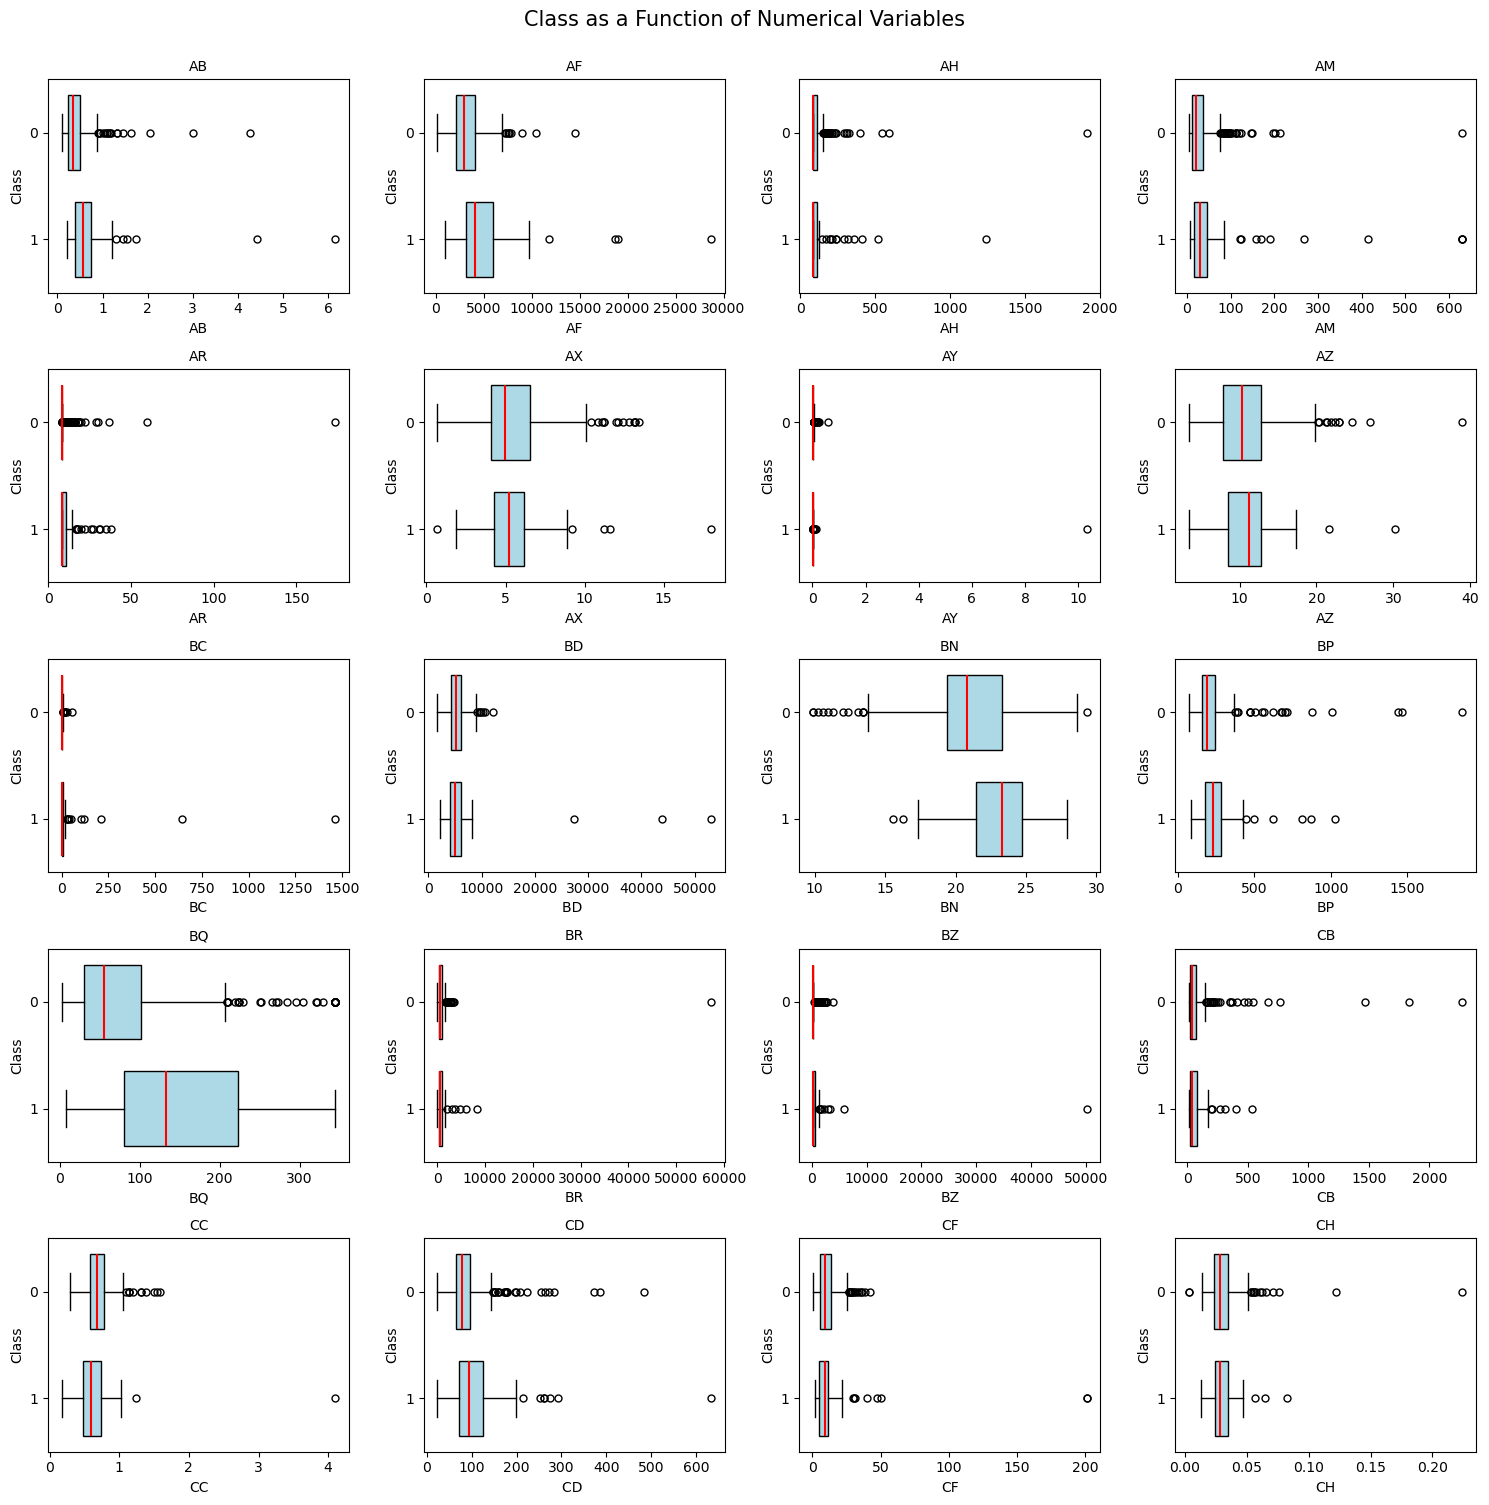

In [183]:
boxplot(train, 1, 21)

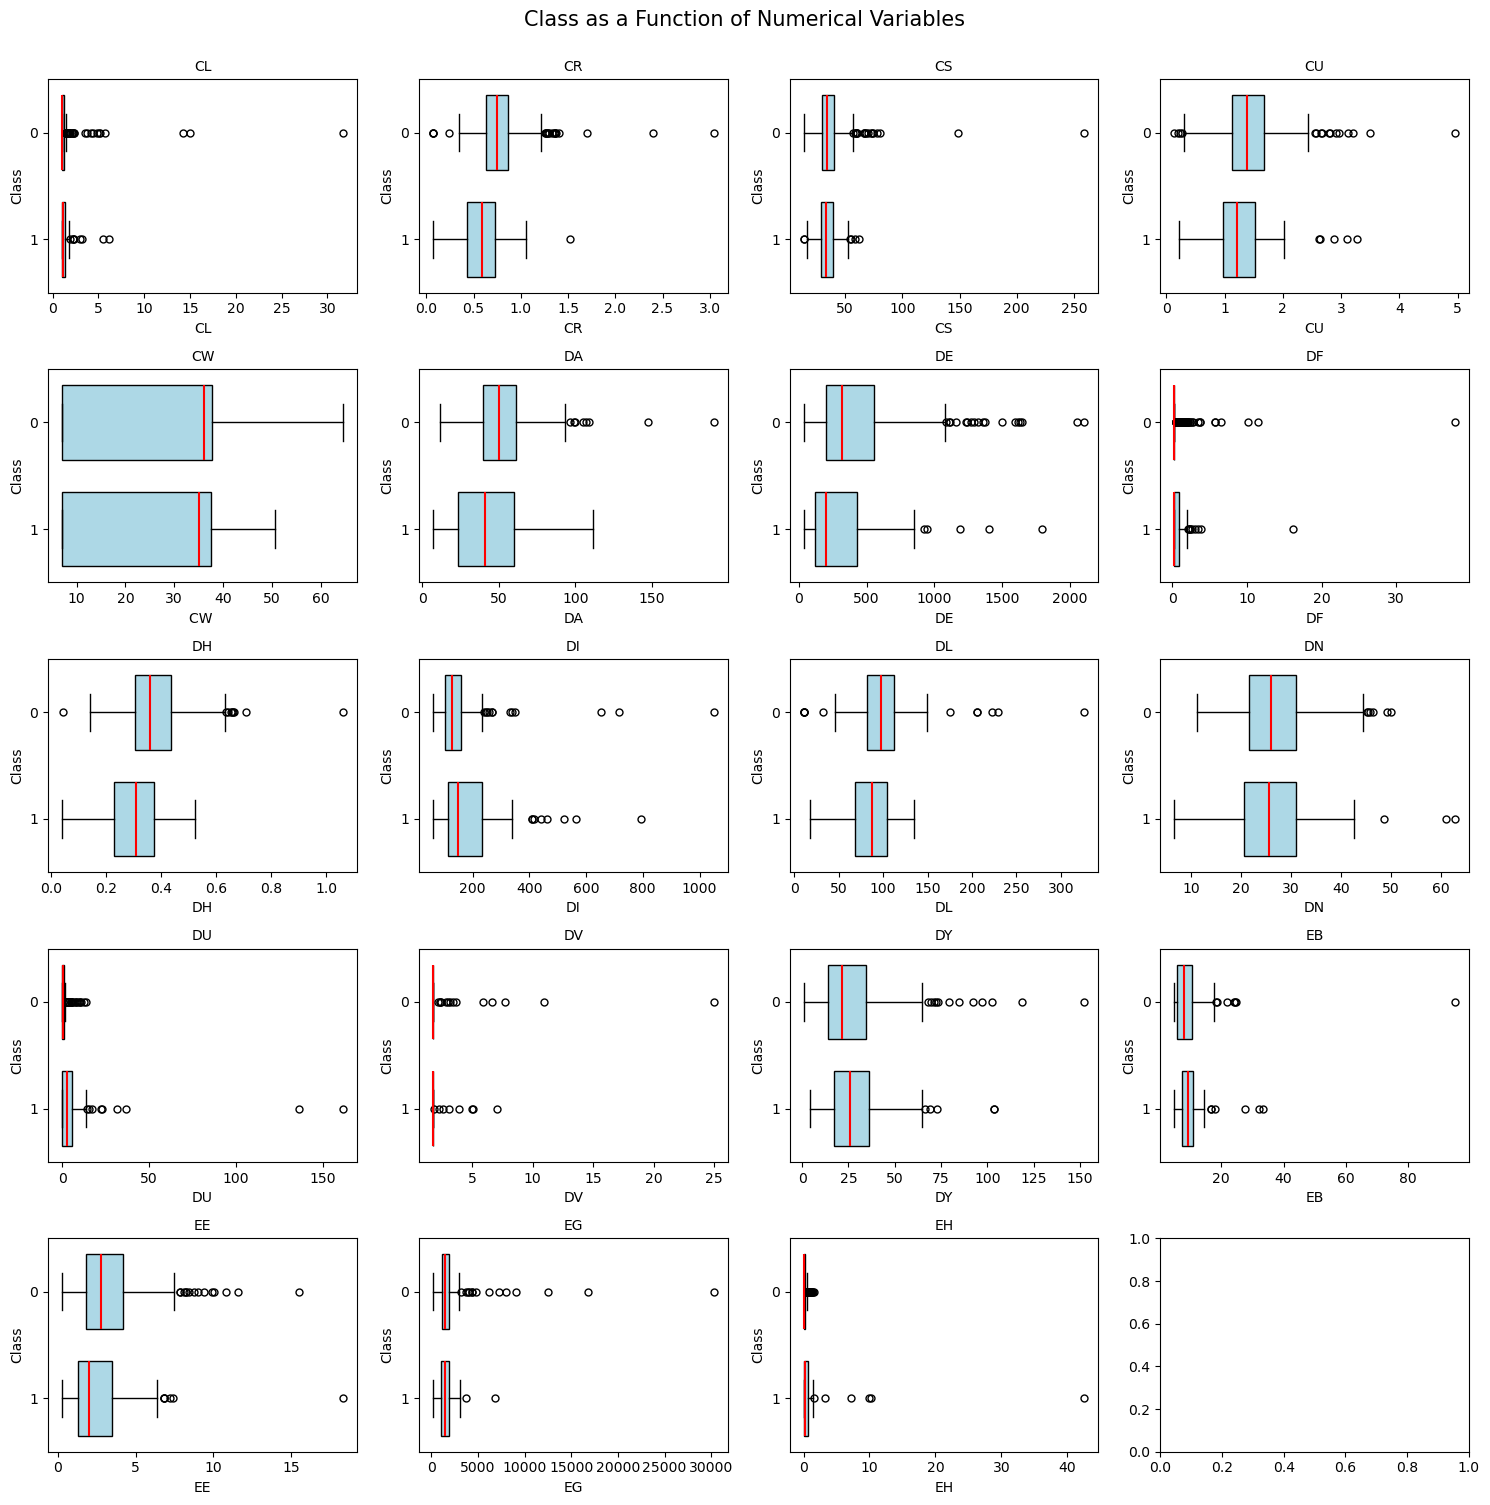

In [184]:
boxplot(train, 21, 40)

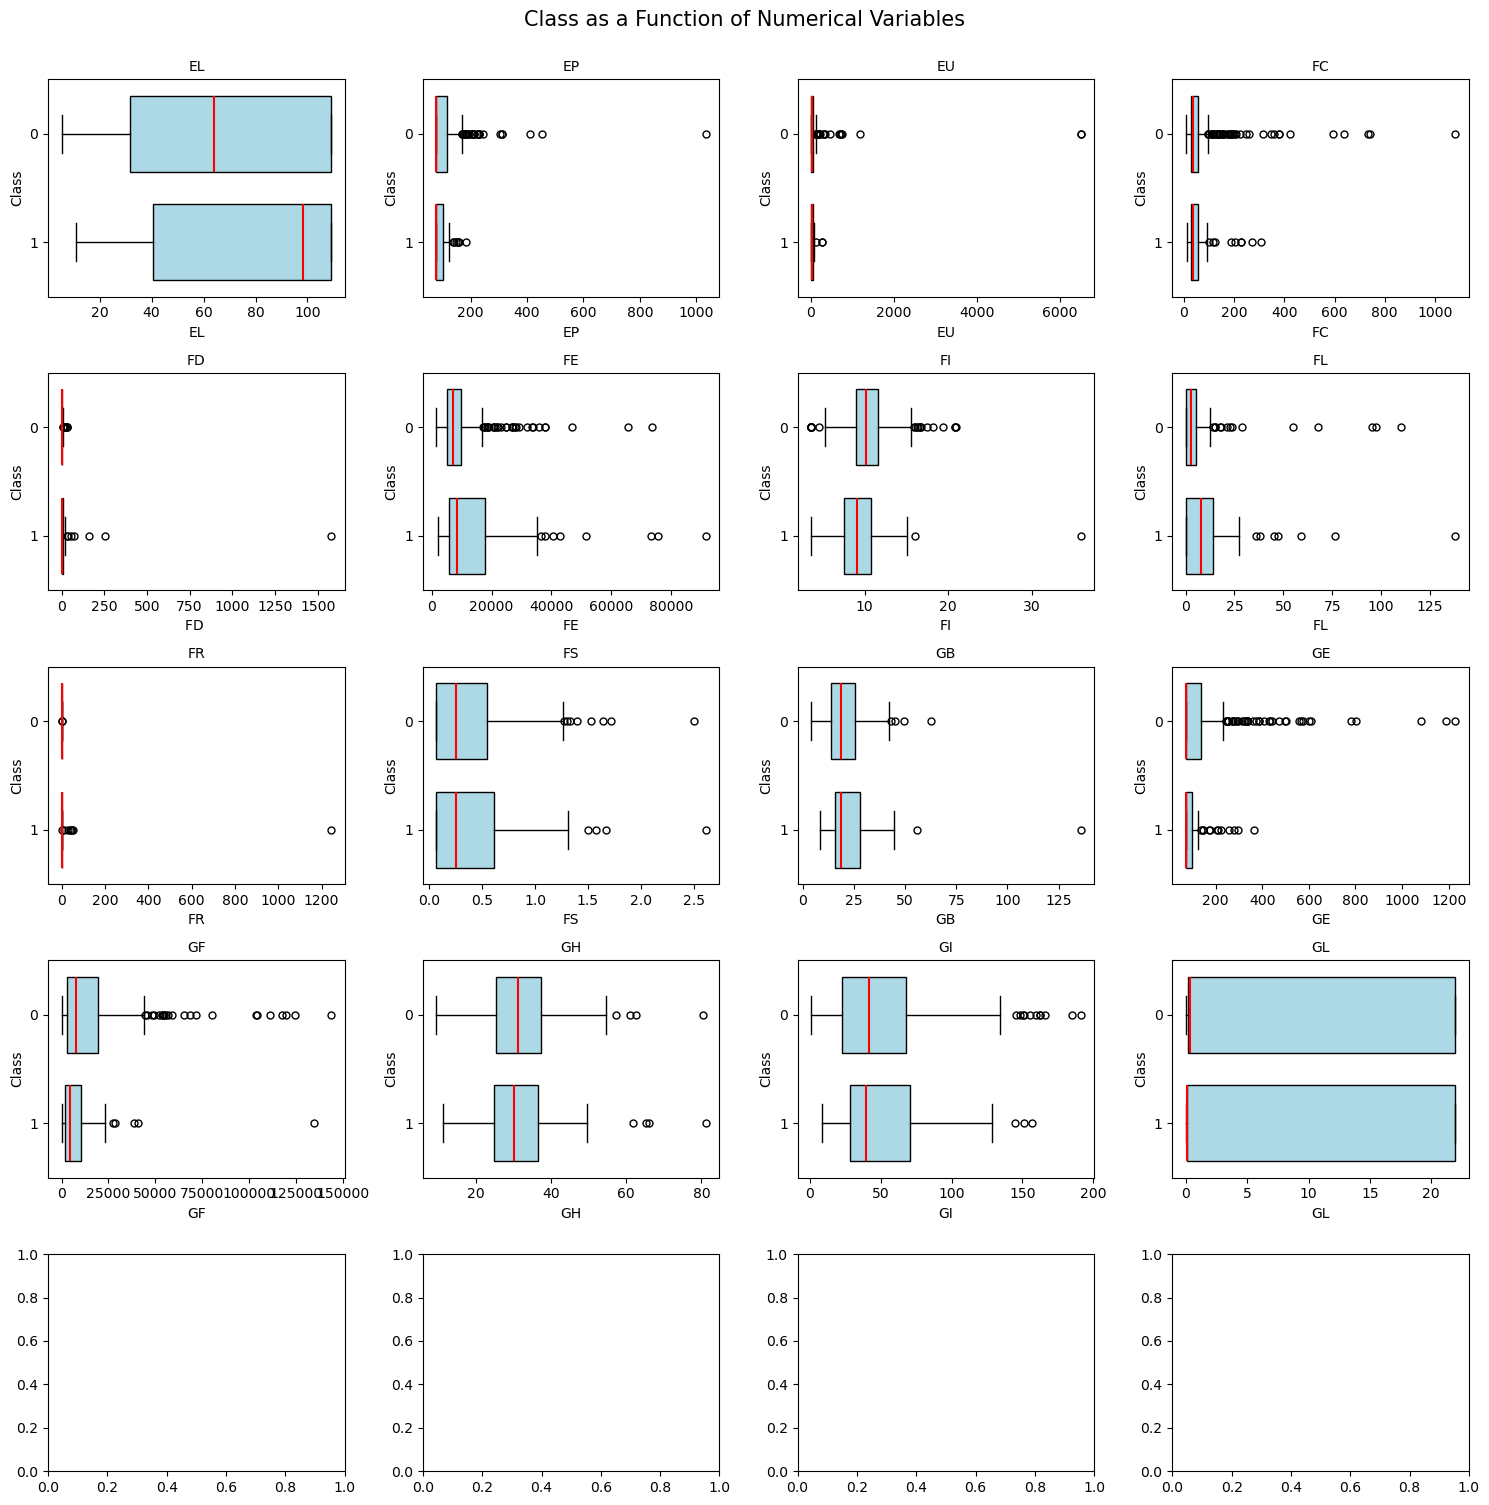

In [185]:
boxplot(train, 41, -1)

On the basis of 25th, 50th (median), 75th percentiles, min and max values of each numerical features as depicted by the boxplots, the relationship between the features and the Y variable (presence and absence of medical condition) is explored. Relationship is observed for some features, such as AB, CR, BQ, BN and EL. This suggests that knowinng the values of these variables may provide useful information on the likeihood of whether the patients will suffer from age-related medical condition.

**3.3 Relationship between presence/absence of age-related condition (Y) and categorical features(X).**

In [188]:
# Create a table to get the counts of presence and absence of aged-related condition in each EJ category.
EJ = cross_table(train['EJ'], train['Class'])
EJ

Class,0,1,Total,0(%),1(%)
EJ,,,,,
A,133,20,153,86.928105,13.071895
B,222,56,278,79.856115,20.143885


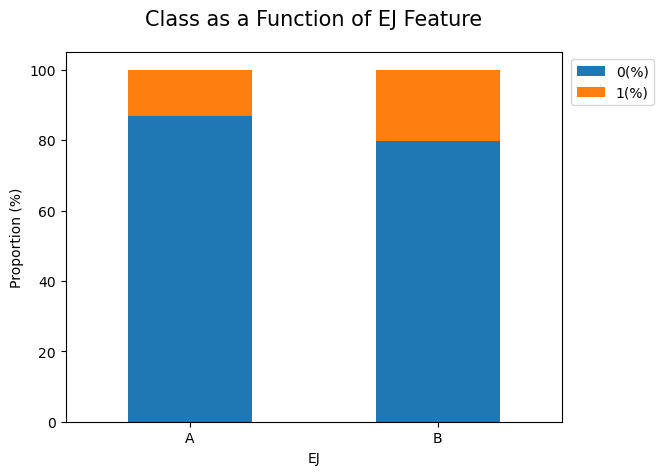

In [189]:
stackBar(EJ, 'EJ', 'Proportion (%)', "Class as a Function of EJ Feature")

To explore if there is a relationship between the Y variable and EJ feature, a stacked barchart is used to
look at the proportion of presence and absence of age-related condition in each of the Dew Point categories. Proportion, instead of raw counts, is plotted because the number of A and B category in EJ feature are different. It would be misleading to just look at the raw counts.

From the barchart, we can see that the proportions of presence and absence of age-related condition varies slightly across the different EJ categories.
This indicates that a weak relationship may exist between the 2 variables. This, however, needs to be quantitatively verified by statistical test.
Since both are categorical variables, Chi Square test is used here.

In [191]:
# Chi Square test.
print(stats.chi2_contingency(EJ.iloc[:,0:2]))

Chi2ContingencyResult(statistic=2.92877131055806, pvalue=0.08701369220663825, dof=1, expected_freq=array([[126.02088167,  26.97911833],
       [228.97911833,  49.02088167]]))


With a p-value of more than 0.05, Chi square test results shows that the variations observed are not statistically significant.

**3.4 Check if the dataset is balanced or imbalanced with respect to the Y variable.**

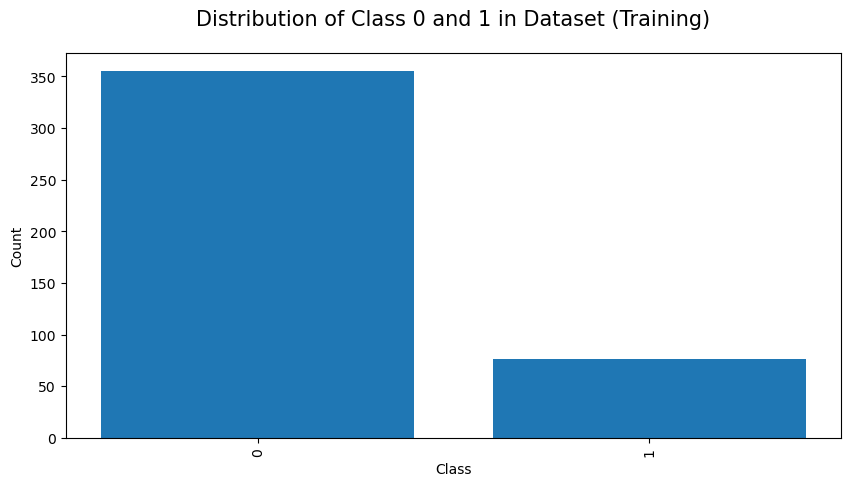

In [194]:
plt.figure(figsize = (10,5))
plt.bar(train['Class'].astype('str').value_counts().index, train['Class'].astype('str').value_counts().values)
plt.xlabel('Class', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Distribution of Class 0 and 1 in Dataset (Training)", fontsize=15, y=1.05)
plt.xticks(rotation=90)
plt.show()

The barchart shows the count of each of the 2 classes of Y variable in the training set. The 2 classes are not balanced, indicating that it is an imbalanced dataset with regard to the Y variable. This information should be taken into account when training model to predict the 2 classes, as there are less instances from the underrepresented classes for the algorithm to learn during training. This suggest that techniques (e.g weighting or SMOTE) for dealing with imabalanced dataset need to be applied. An approprate evalution metric (e.g balanced accuracy) must also be selected to assess the performance of our model.

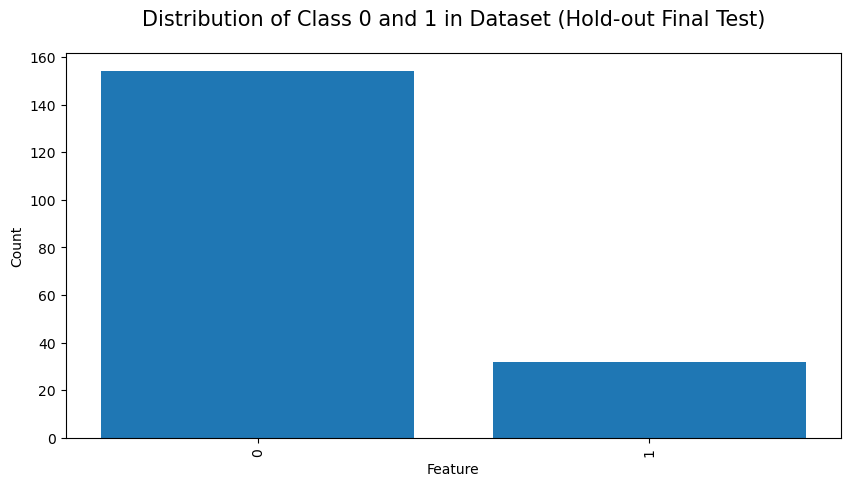

In [196]:
plt.figure(figsize = (10,5))
plt.bar(test['Class'].astype('str').value_counts().index, test['Class'].astype('str').value_counts().values)
plt.xlabel('Feature', fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Distribution of Class 0 and 1 in Dataset (Hold-out Final Test)", fontsize=15, y=1.05)
plt.xticks(rotation=90)
plt.show()

The barchart shows the count of each of the 2 classes of Y variable in the hold-out final test set. As with the training set, the 2 classes are not balanced, indicating that it is an imbalanced dataset with regard to the Y variable.

In [198]:
# train.to_csv('train.csv', index=False)
# test.to_csv('final_test.csv', index=False)